<a href="https://colab.research.google.com/github/shriver42/ESAA/blob/%ED%95%84%EC%82%AC-%EA%B3%BC%EC%A0%9C/0412_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[01] Light GBM
- XGBoost보다 학습에 걸리는 시간이 훨씬 적다
- 적은 데이터 세트에서 과적합이 발생하기 쉽다
- 리프 트리 분할 방식 사용
 - 트리 균형을 맞추지 않고 최대 손실 갑슬 가지는 리프 노드를 지속적으로 분할함
 - 트링의 깊이가 깊고 비대칭적인 트릭가 생성됨
 - 지속적인 반복 학습을 통해 결국 예측 오류 손실 최소화 가능


- 주요 파라미터
 - num_iterations[default = 100 ] : 반복 수행하려는 트리 개수 지정. 크게 지정할 수록 예측 성능 높아지지만 과적합 문제도 발생 가능
 - learning_rate[ default = 0.1] : 업데이트 되는 학습률로 0에서 1사이의 값을 가짐
 - max_depth [ default = 1] : 0보다 작은 값 지정시, 깊이에 제한이 없음
 - min_data_in_leaf [default = 20] : 최종 결정 클래스인 리프 노드가 되기 위해 필요한 레코드의 수
 - num_leaves[default = 31] : 하나의 트리가 가질수 있는 최대 리프 개수
 - boosting [default = gbdt] : 부스팅 트리를 생성하는 알고리즘 기술 (gbdt : 그래디언트, rt : 랜덤 포레스트)
 - bagging_fraction[default=1.0] : 데이터 샘플링 비율을 지정해 트리 과적합 방지
 - feature_fraction [default = 1.0] : 개별 트리 학습 시 무작위로 선택하는 피처의 비율
 - lambda_l2[default = 0.0] : L2 regulation 제어를 위한 값
 - lambda_l1[default = 0.0] : L1 regulation 제어를 위한 값

- 하이퍼 파라미터 튜닝 방안
 - num_leaves의 개수를 중심으로 min_data_in_leaf, max_depth를 함께 조정하면서 모델의 복잡도를 줄인다
 - learning_rate를 작게 하면서 n_estimator를 크게 한다. n_estimator을 너무 크게 하면 과적합 문제 발생 가능
 - reg_lambda, reg_alpha 와 같은 regulation을 적용하여 과적합 제어
 - colsample_bytree, subsample 파라미터를 적용해 피처의 개수나 데이터 샘플링 레코드 개수를 줄일 수 있음

LightGBM 적용 예시 - 위스콘신 유방암 예측

In [3]:
!pip install lightgbm==3.3.2
import lightgbm
print(lightgbm.__version__)

3.3.2


In [4]:
#LightGBM의 파이썬 패키지인 lightgbm에서 GBMClassifier 임포트
from lightgbm import LGBMClassifier

import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

datasets = load_breast_cancer()
ftr = datasets.data
target = datasets.target

#전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test, y_train, y_test = train_test_split(ftr,target, test_size = 0.2, random_state = 156)

#앞서 XGBoost와 동일하게 n_estimator는 400 설정
lgbm_wrapper = LGBMClassifier(n_esttimator = 400)

#LightGBM도 XGBoost와 동일하게 조기 중단 수행 가능
evals = [(X_test, y_test)]
lgbm_wrapper.fit(X_train, y_train, early_stopping_rounds = 100, eval_metric = 'logloss', eval_set = evals, verbose=True)
preds = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:, 1]

[LightGBM] [Warning] Unknown parameter: n_esttimator


/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's binary_logloss: 0.565079
[2]	valid_0's binary_logloss: 0.507451
[3]	valid_0's binary_logloss: 0.458489
[4]	valid_0's binary_logloss: 0.417481
[5]	valid_0's binary_logloss: 0.385507
[6]	valid_0's binary_logloss: 0.355773
[7]	valid_0's binary_logloss: 0.329587
[8]	valid_0's binary_logloss: 0.308478
[9]	valid_0's binary_logloss: 0.285395
[10]	valid_0's binary_logloss: 0.267055
[11]	valid_0's binary_logloss: 0.252013
[12]	valid_0's binary_logloss: 0.237018
[13]	valid_0's binary_logloss: 0.224756
[14]	valid_0's binary_logloss: 0.213383
[15]	valid_0's binary_logloss: 0.203058
[16]	valid_0's binary_logloss: 0.194015
[17]	valid_0's binary_logloss: 0.186412
[18]	valid_0's binary_logloss: 0.179108
[19]	valid_0's binary_logloss: 0.174004
[20]	valid_0's binary_logloss: 0.167155
[21]	valid_0's binary_logloss: 0.162494
[22]	valid_0's binary_logloss: 0.156886
[23]	valid_0's binary_logloss: 0.152855
[24]	valid_0's binary_logloss: 0.151113
[25]	valid_0's binary_logloss: 0.148395
[26]	vali

In [5]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix,precision_recall_curve,roc_curve

def get_clf_eval(y_test,pred=None,pred_proba=None):
  confusion = confusion_matrix(y_test,pred)
  accuracy = accuracy_score(y_test,pred)
  precision = precision_score(y_test,pred)
  recall = recall_score(y_test,pred)
  f1 = f1_score(y_test,pred)
  roc_auc = roc_auc_score(y_test,pred_proba)
  print('오차 행렬')
  print(confusion)
  print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율 : {2:.4f}, F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision,recall,f1,roc_auc))

get_clf_eval(y_test,preds,pred_proba)

오차 행렬
[[33  4]
 [ 1 76]]
정확도: 0.9561, 정밀도: 0.9500, 재현율 : 0.9870, F1: 0.9682, AUC:0.9905


<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

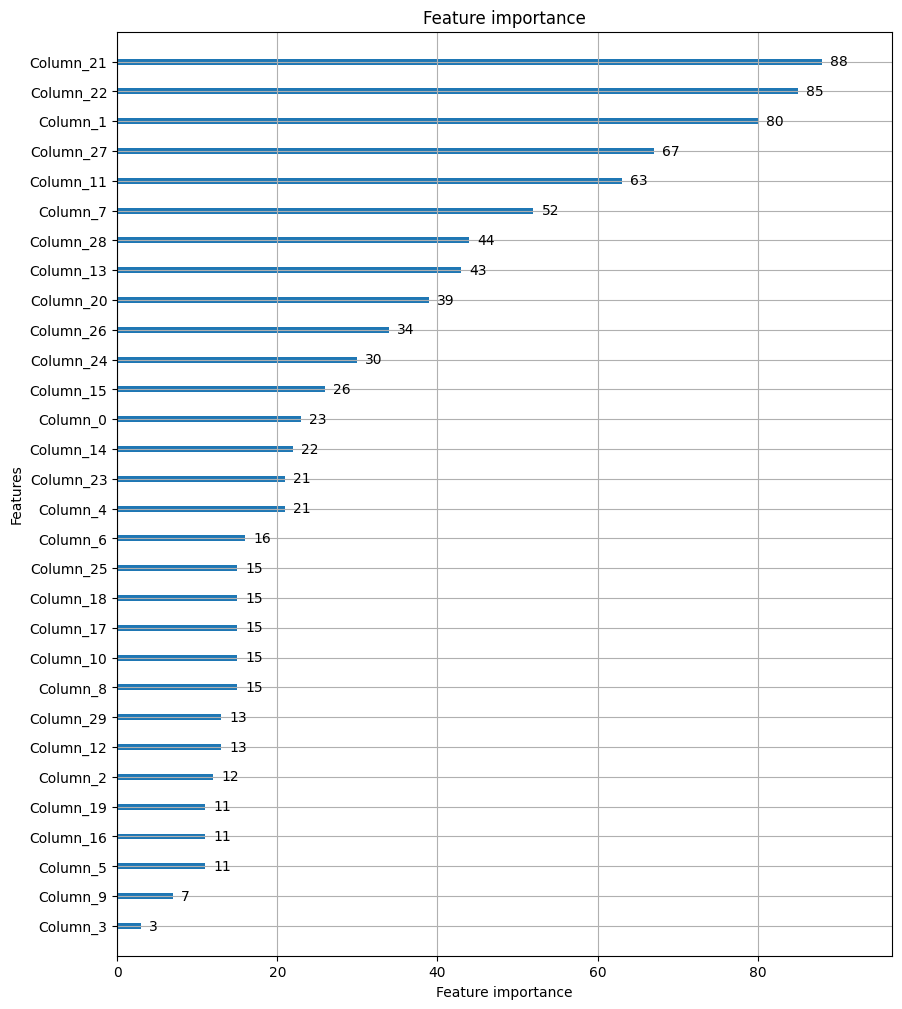

In [6]:
#plot_importance()를 이용해 피처 중요도 시각화
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10,12))
plot_importance(lgbm_wrapper, ax = ax)

plot_importance()로 학습할 경우, 피처명을 알 수 없기에 column_ 뒤에 피처 순서대로 숫자를 붙여 나열함

[02] 분류 실습 - 캐글 산탄데르 고객 만족 예측

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

cust_df = pd.read_csv('./train_santander.csv', encoding='latin-1')
print('dataset shape:', cust_df.shape)
cust_df.head(3)

dataset shape: (76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.03,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.77,0


In [8]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [9]:
print(cust_df['TARGET'].value_counts())
unsatisfied_cnt = cust_df[cust_df['TARGET']==1].TARGET.count()
total_cnt = cust_df.TARGET.count()
print('unsatisfied 비율은 {0:2f}'.format((unsatisfied_cnt/total_cnt)))

TARGET
0    73012
1     3008
Name: count, dtype: int64
unsatisfied 비율은 0.039569


대부분이 만족하며, 불만족하는 고객은 4% 밖에 되지 않는 다는 사실을 알 수 있다

In [10]:
cust_df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [11]:
#위의 결과로부터 var3에 있는 -999999 을 가장 많은 값인 2로 변환하고 ID 피처 드롭하기
cust_df['var3'].replace(-9999999,2,inplace=True)
cust_df.drop('ID', axis=1)

#피처 세트와 레이블 세트 분리. 레이블 칼럼은 DataFrame의 맨 마지막에 위치해 칼럼 위치 -1로 분리
X_features = cust_df.iloc[:, :-1]
y_labels = cust_df.iloc[:, -1]
print('피처 데이터 shape:{0}'.format(X_features.shape))

피처 데이터 shape:(76020, 370)


In [12]:
#비대칭한 데이터 세트이기에 학습 데이터가 테스트 데이터 세트에 비슷하게 추출되었는지 확인
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels, test_size = 0.2, random_state=0)

train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 shape: {0}, 테스트 세트 shape: {1}'.format(X_train.shape, X_test.shape))

print('학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt)

학습 세트 shape: (60816, 370), 테스트 세트 shape: (15204, 370)
학습 세트 레이블 값 분포 비율
TARGET
0    0.960964
1    0.039036
Name: count, dtype: float64

 테스트 세트 레이블 값 분포 비율
TARGET
0    0.9583
1    0.0417
Name: count, dtype: float64


In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)

In [14]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

#n_estimator는 500으로, random state는 예제 수행 시마다 동일 예측 결과를 위해 설정
xgb_clf = XGBClassifier(n_estimators=500, random_state = 156)

#성능 평가 지표를  auc로, 조기 중단 파라미터는 100으로 설정하고 학습 수행
xgb_clf.fit(X_train, y_train, early_stopping_rounds = 100, eval_metric='auc', eval_set=[(X_train, y_train), (X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:, 1], average='macro')
print('ROC AUC: {0:4f}'.format(xgb_roc_score))

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.83791	validation_1-auc:0.82536
[1]	validation_0-auc:0.84304	validation_1-auc:0.82870
[2]	validation_0-auc:0.84952	validation_1-auc:0.83288
[3]	validation_0-auc:0.85566	validation_1-auc:0.83734
[4]	validation_0-auc:0.85967	validation_1-auc:0.83828
[5]	validation_0-auc:0.86189	validation_1-auc:0.83998
[6]	validation_0-auc:0.86595	validation_1-auc:0.84012
[7]	validation_0-auc:0.87046	validation_1-auc:0.83823
[8]	validation_0-auc:0.87319	validation_1-auc:0.83976
[9]	validation_0-auc:0.87596	validation_1-auc:0.83883
[10]	validation_0-auc:0.87823	validation_1-auc:0.83752
[11]	validation_0-auc:0.88006	validation_1-auc:0.83809
[12]	validation_0-auc:0.88204	validation_1-auc:0.83879
[13]	validation_0-auc:0.88405	validation_1-auc:0.83809
[14]	validation_0-auc:0.88508	validation_1-auc:0.83802
[15]	validation_0-auc:0.88683	validation_1-auc:0.83833
[16]	validation_0-auc:0.88841	validation_1-auc:0.83811
[17]	validation_0-auc:0.89068	validation_1-auc:0.83777
[18]	validation_0-au

In [15]:
from sklearn.model_selection import GridSearchCV

#하이퍼 파라미터 테스트의 수행 속도를 향상 시키기 위해 n_estimators를 100으로 감소
xgb_clf = XGBClassifier(n_estimators = 100)

params = {'max_depth' : [5,7], 'min_child_weight' : [1,3], 'colsample_bytree': [0.5,0.75] }

#cv는 3으로 가정
gridcv = GridSearchCV(xgb_clf, param_grid = params, cv=3)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric='auc', eval_set=[(X_train,y_train), (X_test, y_test)])
print('GridSearchCV 최적 파라미터: ', gridcv.best_params_)

xgb_roc_score = roc_auc_score(y_test,gridcv.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.72801	validation_1-auc:0.73077
[1]	validation_0-auc:0.82016	validation_1-auc:0.81790
[2]	validation_0-auc:0.81654	validation_1-auc:0.81767
[3]	validation_0-auc:0.81511	validation_1-auc:0.81167
[4]	validation_0-auc:0.83188	validation_1-auc:0.82761
[5]	validation_0-auc:0.84137	validation_1-auc:0.83425
[6]	validation_0-auc:0.84655	validation_1-auc:0.83481
[7]	validation_0-auc:0.84956	validation_1-auc:0.83704
[8]	validation_0-auc:0.85145	validation_1-auc:0.83376
[9]	validation_0-auc:0.85123	validation_1-auc:0.83383
[10]	validation_0-auc:0.85285	validation_1-auc:0.83119
[11]	validation_0-auc:0.85454	validation_1-auc:0.83189
[12]	validation_0-auc:0.85450	validation_1-auc:0.83122
[13]	validation_0-auc:0.85491	validation_1-auc:0.83136
[14]	validation_0-auc:0.85807	validation_1-auc:0.83422
[15]	validation_0-auc:0.86003	validation_1-auc:0.83549
[16]	validation_0-auc:0.86196	validation_1-auc:0.83700
[17]	validation_0-auc:0.86276	validation_1-auc:0.83803
[18]	validation_0-au

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.74008	validation_1-auc:0.74052
[1]	validation_0-auc:0.82642	validation_1-auc:0.82323
[2]	validation_0-auc:0.82238	validation_1-auc:0.82187
[3]	validation_0-auc:0.82020	validation_1-auc:0.82042
[4]	validation_0-auc:0.83785	validation_1-auc:0.83484
[5]	validation_0-auc:0.84498	validation_1-auc:0.83750
[6]	validation_0-auc:0.85041	validation_1-auc:0.84156
[7]	validation_0-auc:0.85219	validation_1-auc:0.84246
[8]	validation_0-auc:0.85387	validation_1-auc:0.83999
[9]	validation_0-auc:0.85392	validation_1-auc:0.83905
[10]	validation_0-auc:0.85540	validation_1-auc:0.83722
[11]	validation_0-auc:0.85500	validation_1-auc:0.83746
[12]	validation_0-auc:0.85612	validation_1-auc:0.83698
[13]	validation_0-auc:0.85695	validation_1-auc:0.83688
[14]	validation_0-auc:0.86067	validation_1-auc:0.83844
[15]	validation_0-auc:0.86274	validation_1-auc:0.83931
[16]	validation_0-auc:0.86479	validation_1-auc:0.84019
[17]	validation_0-auc:0.86536	validation_1-auc:0.84075
[18]	validation_0-au

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.75196	validation_1-auc:0.75192
[1]	validation_0-auc:0.82517	validation_1-auc:0.82279
[2]	validation_0-auc:0.82254	validation_1-auc:0.82118
[3]	validation_0-auc:0.82092	validation_1-auc:0.81519
[4]	validation_0-auc:0.83439	validation_1-auc:0.82886
[5]	validation_0-auc:0.84382	validation_1-auc:0.83405
[6]	validation_0-auc:0.85015	validation_1-auc:0.83736
[7]	validation_0-auc:0.85192	validation_1-auc:0.83913
[8]	validation_0-auc:0.85263	validation_1-auc:0.83899
[9]	validation_0-auc:0.85340	validation_1-auc:0.83699
[10]	validation_0-auc:0.85437	validation_1-auc:0.83475
[11]	validation_0-auc:0.85550	validation_1-auc:0.83423
[12]	validation_0-auc:0.85616	validation_1-auc:0.83477
[13]	validation_0-auc:0.85642	validation_1-auc:0.83504
[14]	validation_0-auc:0.86061	validation_1-auc:0.83918
[15]	validation_0-auc:0.86279	validation_1-auc:0.84134
[16]	validation_0-auc:0.86468	validation_1-auc:0.84190
[17]	validation_0-auc:0.86545	validation_1-auc:0.84164
[18]	validation_0-au

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.73114	validation_1-auc:0.73468
[1]	validation_0-auc:0.82176	validation_1-auc:0.82031
[2]	validation_0-auc:0.81679	validation_1-auc:0.81918
[3]	validation_0-auc:0.81542	validation_1-auc:0.81329
[4]	validation_0-auc:0.83122	validation_1-auc:0.82812
[5]	validation_0-auc:0.84078	validation_1-auc:0.83518
[6]	validation_0-auc:0.84603	validation_1-auc:0.83778
[7]	validation_0-auc:0.84793	validation_1-auc:0.83764
[8]	validation_0-auc:0.84962	validation_1-auc:0.83417
[9]	validation_0-auc:0.84987	validation_1-auc:0.83312
[10]	validation_0-auc:0.85120	validation_1-auc:0.83305
[11]	validation_0-auc:0.85257	validation_1-auc:0.83544
[12]	validation_0-auc:0.85242	validation_1-auc:0.83474
[13]	validation_0-auc:0.85276	validation_1-auc:0.83309
[14]	validation_0-auc:0.85619	validation_1-auc:0.83507
[15]	validation_0-auc:0.85813	validation_1-auc:0.83682
[16]	validation_0-auc:0.85985	validation_1-auc:0.83745
[17]	validation_0-auc:0.86023	validation_1-auc:0.83766
[18]	validation_0-au

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.74040	validation_1-auc:0.74038
[1]	validation_0-auc:0.82693	validation_1-auc:0.82510
[2]	validation_0-auc:0.82248	validation_1-auc:0.82098
[3]	validation_0-auc:0.82082	validation_1-auc:0.82025
[4]	validation_0-auc:0.83584	validation_1-auc:0.83265
[5]	validation_0-auc:0.84428	validation_1-auc:0.83736
[6]	validation_0-auc:0.84835	validation_1-auc:0.83941
[7]	validation_0-auc:0.85085	validation_1-auc:0.84198
[8]	validation_0-auc:0.85181	validation_1-auc:0.84000
[9]	validation_0-auc:0.85095	validation_1-auc:0.83941
[10]	validation_0-auc:0.85191	validation_1-auc:0.83884
[11]	validation_0-auc:0.85255	validation_1-auc:0.83872
[12]	validation_0-auc:0.85271	validation_1-auc:0.83846
[13]	validation_0-auc:0.85333	validation_1-auc:0.83702
[14]	validation_0-auc:0.85731	validation_1-auc:0.83887
[15]	validation_0-auc:0.85898	validation_1-auc:0.84142
[16]	validation_0-auc:0.86070	validation_1-auc:0.84181
[17]	validation_0-auc:0.86122	validation_1-auc:0.84182
[18]	validation_0-au

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.75644	validation_1-auc:0.75295
[1]	validation_0-auc:0.82672	validation_1-auc:0.82237
[2]	validation_0-auc:0.82262	validation_1-auc:0.81702
[3]	validation_0-auc:0.82031	validation_1-auc:0.81435
[4]	validation_0-auc:0.83525	validation_1-auc:0.82990
[5]	validation_0-auc:0.84406	validation_1-auc:0.83520
[6]	validation_0-auc:0.84896	validation_1-auc:0.83922
[7]	validation_0-auc:0.85081	validation_1-auc:0.84031
[8]	validation_0-auc:0.85202	validation_1-auc:0.84052
[9]	validation_0-auc:0.85328	validation_1-auc:0.83883
[10]	validation_0-auc:0.85427	validation_1-auc:0.83776
[11]	validation_0-auc:0.85523	validation_1-auc:0.83692
[12]	validation_0-auc:0.85513	validation_1-auc:0.83754
[13]	validation_0-auc:0.85555	validation_1-auc:0.83655
[14]	validation_0-auc:0.85942	validation_1-auc:0.84015
[15]	validation_0-auc:0.86145	validation_1-auc:0.84262
[16]	validation_0-auc:0.86290	validation_1-auc:0.84254
[17]	validation_0-auc:0.86303	validation_1-auc:0.84260
[18]	validation_0-au

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.75606	validation_1-auc:0.74267
[1]	validation_0-auc:0.83451	validation_1-auc:0.82468
[2]	validation_0-auc:0.82799	validation_1-auc:0.81663
[3]	validation_0-auc:0.83114	validation_1-auc:0.81289
[4]	validation_0-auc:0.84767	validation_1-auc:0.82572
[5]	validation_0-auc:0.85718	validation_1-auc:0.82987
[6]	validation_0-auc:0.86260	validation_1-auc:0.83178
[7]	validation_0-auc:0.86573	validation_1-auc:0.83349
[8]	validation_0-auc:0.86718	validation_1-auc:0.83028
[9]	validation_0-auc:0.86840	validation_1-auc:0.82849
[10]	validation_0-auc:0.87120	validation_1-auc:0.82733
[11]	validation_0-auc:0.87302	validation_1-auc:0.82642
[12]	validation_0-auc:0.87335	validation_1-auc:0.82623
[13]	validation_0-auc:0.87336	validation_1-auc:0.82504
[14]	validation_0-auc:0.87720	validation_1-auc:0.82853
[15]	validation_0-auc:0.87997	validation_1-auc:0.82974
[16]	validation_0-auc:0.88176	validation_1-auc:0.83067
[17]	validation_0-auc:0.88171	validation_1-auc:0.83055
[18]	validation_0-au

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.75969	validation_1-auc:0.75174
[1]	validation_0-auc:0.83931	validation_1-auc:0.82144
[2]	validation_0-auc:0.83506	validation_1-auc:0.81874
[3]	validation_0-auc:0.83516	validation_1-auc:0.81431
[4]	validation_0-auc:0.85223	validation_1-auc:0.82797
[5]	validation_0-auc:0.86122	validation_1-auc:0.83272
[6]	validation_0-auc:0.86662	validation_1-auc:0.83700
[7]	validation_0-auc:0.87025	validation_1-auc:0.83958
[8]	validation_0-auc:0.87276	validation_1-auc:0.83893
[9]	validation_0-auc:0.87438	validation_1-auc:0.83757
[10]	validation_0-auc:0.87614	validation_1-auc:0.83600
[11]	validation_0-auc:0.87612	validation_1-auc:0.83496
[12]	validation_0-auc:0.87700	validation_1-auc:0.83495
[13]	validation_0-auc:0.87771	validation_1-auc:0.83397
[14]	validation_0-auc:0.88090	validation_1-auc:0.83741
[15]	validation_0-auc:0.88351	validation_1-auc:0.83904
[16]	validation_0-auc:0.88582	validation_1-auc:0.83869
[17]	validation_0-auc:0.88599	validation_1-auc:0.83802
[18]	validation_0-au

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.77278	validation_1-auc:0.76206
[1]	validation_0-auc:0.83620	validation_1-auc:0.82199
[2]	validation_0-auc:0.83211	validation_1-auc:0.81630
[3]	validation_0-auc:0.83314	validation_1-auc:0.81174
[4]	validation_0-auc:0.84899	validation_1-auc:0.82514
[5]	validation_0-auc:0.85810	validation_1-auc:0.83330
[6]	validation_0-auc:0.86498	validation_1-auc:0.83716
[7]	validation_0-auc:0.86782	validation_1-auc:0.83949
[8]	validation_0-auc:0.86975	validation_1-auc:0.83730
[9]	validation_0-auc:0.87113	validation_1-auc:0.83485
[10]	validation_0-auc:0.87322	validation_1-auc:0.83397
[11]	validation_0-auc:0.87503	validation_1-auc:0.83311
[12]	validation_0-auc:0.87567	validation_1-auc:0.83105
[13]	validation_0-auc:0.87699	validation_1-auc:0.82993
[14]	validation_0-auc:0.88061	validation_1-auc:0.83360
[15]	validation_0-auc:0.88343	validation_1-auc:0.83533
[16]	validation_0-auc:0.88677	validation_1-auc:0.83371
[17]	validation_0-auc:0.88724	validation_1-auc:0.83350
[18]	validation_0-au

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.75821	validation_1-auc:0.74353
[1]	validation_0-auc:0.83361	validation_1-auc:0.82478
[2]	validation_0-auc:0.82871	validation_1-auc:0.82065
[3]	validation_0-auc:0.83054	validation_1-auc:0.81611
[4]	validation_0-auc:0.84710	validation_1-auc:0.82641
[5]	validation_0-auc:0.85530	validation_1-auc:0.83000
[6]	validation_0-auc:0.86153	validation_1-auc:0.83351
[7]	validation_0-auc:0.86398	validation_1-auc:0.83597
[8]	validation_0-auc:0.86554	validation_1-auc:0.83493
[9]	validation_0-auc:0.86606	validation_1-auc:0.83226
[10]	validation_0-auc:0.86681	validation_1-auc:0.82852
[11]	validation_0-auc:0.86807	validation_1-auc:0.82797
[12]	validation_0-auc:0.86805	validation_1-auc:0.82788
[13]	validation_0-auc:0.86842	validation_1-auc:0.82517
[14]	validation_0-auc:0.87190	validation_1-auc:0.82745
[15]	validation_0-auc:0.87352	validation_1-auc:0.82912
[16]	validation_0-auc:0.87550	validation_1-auc:0.83091
[17]	validation_0-auc:0.87566	validation_1-auc:0.83006
[18]	validation_0-au

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.75789	validation_1-auc:0.75225
[1]	validation_0-auc:0.83794	validation_1-auc:0.82543
[2]	validation_0-auc:0.83190	validation_1-auc:0.82119
[3]	validation_0-auc:0.83123	validation_1-auc:0.81964
[4]	validation_0-auc:0.85153	validation_1-auc:0.83085
[5]	validation_0-auc:0.86034	validation_1-auc:0.83620
[6]	validation_0-auc:0.86431	validation_1-auc:0.83871
[7]	validation_0-auc:0.86669	validation_1-auc:0.84193
[8]	validation_0-auc:0.86803	validation_1-auc:0.84089
[9]	validation_0-auc:0.86872	validation_1-auc:0.84005
[10]	validation_0-auc:0.87047	validation_1-auc:0.83830
[11]	validation_0-auc:0.86989	validation_1-auc:0.83644
[12]	validation_0-auc:0.87086	validation_1-auc:0.83622
[13]	validation_0-auc:0.87241	validation_1-auc:0.83712
[14]	validation_0-auc:0.87618	validation_1-auc:0.84038
[15]	validation_0-auc:0.87797	validation_1-auc:0.84263
[16]	validation_0-auc:0.88032	validation_1-auc:0.84199
[17]	validation_0-auc:0.88095	validation_1-auc:0.84130
[18]	validation_0-au

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.77238	validation_1-auc:0.76367
[1]	validation_0-auc:0.83807	validation_1-auc:0.82653
[2]	validation_0-auc:0.83267	validation_1-auc:0.82203
[3]	validation_0-auc:0.83353	validation_1-auc:0.81585
[4]	validation_0-auc:0.84843	validation_1-auc:0.82837
[5]	validation_0-auc:0.85697	validation_1-auc:0.83656
[6]	validation_0-auc:0.86283	validation_1-auc:0.83712
[7]	validation_0-auc:0.86479	validation_1-auc:0.83994
[8]	validation_0-auc:0.86603	validation_1-auc:0.83872
[9]	validation_0-auc:0.86658	validation_1-auc:0.83708
[10]	validation_0-auc:0.86783	validation_1-auc:0.83605
[11]	validation_0-auc:0.86872	validation_1-auc:0.83412
[12]	validation_0-auc:0.87010	validation_1-auc:0.83347
[13]	validation_0-auc:0.87116	validation_1-auc:0.83353
[14]	validation_0-auc:0.87440	validation_1-auc:0.83650
[15]	validation_0-auc:0.87618	validation_1-auc:0.83890
[16]	validation_0-auc:0.87857	validation_1-auc:0.83810
[17]	validation_0-auc:0.87886	validation_1-auc:0.83833
[18]	validation_0-au

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.80966	validation_1-auc:0.80503
[1]	validation_0-auc:0.82109	validation_1-auc:0.81934
[2]	validation_0-auc:0.82988	validation_1-auc:0.82506
[3]	validation_0-auc:0.83398	validation_1-auc:0.83123
[4]	validation_0-auc:0.83951	validation_1-auc:0.83371
[5]	validation_0-auc:0.84425	validation_1-auc:0.83584
[6]	validation_0-auc:0.84762	validation_1-auc:0.83776
[7]	validation_0-auc:0.84933	validation_1-auc:0.83885
[8]	validation_0-auc:0.85143	validation_1-auc:0.83904
[9]	validation_0-auc:0.85400	validation_1-auc:0.83729
[10]	validation_0-auc:0.85637	validation_1-auc:0.83785
[11]	validation_0-auc:0.85948	validation_1-auc:0.83643
[12]	validation_0-auc:0.85977	validation_1-auc:0.83648
[13]	validation_0-auc:0.86064	validation_1-auc:0.83562
[14]	validation_0-auc:0.86230	validation_1-auc:0.83602
[15]	validation_0-auc:0.86326	validation_1-auc:0.83561
[16]	validation_0-auc:0.86393	validation_1-auc:0.83571
[17]	validation_0-auc:0.86472	validation_1-auc:0.83583
[18]	validation_0-au

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.81190	validation_1-auc:0.80529
[1]	validation_0-auc:0.83132	validation_1-auc:0.82476
[2]	validation_0-auc:0.83814	validation_1-auc:0.82832
[3]	validation_0-auc:0.83957	validation_1-auc:0.83153
[4]	validation_0-auc:0.84517	validation_1-auc:0.83502
[5]	validation_0-auc:0.84733	validation_1-auc:0.83669
[6]	validation_0-auc:0.85029	validation_1-auc:0.83744
[7]	validation_0-auc:0.85268	validation_1-auc:0.83784
[8]	validation_0-auc:0.85410	validation_1-auc:0.83862
[9]	validation_0-auc:0.85667	validation_1-auc:0.83968
[10]	validation_0-auc:0.85898	validation_1-auc:0.84009
[11]	validation_0-auc:0.86085	validation_1-auc:0.84154
[12]	validation_0-auc:0.86229	validation_1-auc:0.84266
[13]	validation_0-auc:0.86334	validation_1-auc:0.84146
[14]	validation_0-auc:0.86467	validation_1-auc:0.84163
[15]	validation_0-auc:0.86535	validation_1-auc:0.84217
[16]	validation_0-auc:0.86620	validation_1-auc:0.84288
[17]	validation_0-auc:0.86719	validation_1-auc:0.84259
[18]	validation_0-au

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.81882	validation_1-auc:0.82000
[1]	validation_0-auc:0.82975	validation_1-auc:0.82685
[2]	validation_0-auc:0.83432	validation_1-auc:0.83095
[3]	validation_0-auc:0.83924	validation_1-auc:0.83360
[4]	validation_0-auc:0.84348	validation_1-auc:0.83407
[5]	validation_0-auc:0.84552	validation_1-auc:0.83415
[6]	validation_0-auc:0.84781	validation_1-auc:0.83571
[7]	validation_0-auc:0.85151	validation_1-auc:0.83540
[8]	validation_0-auc:0.85457	validation_1-auc:0.83702
[9]	validation_0-auc:0.85674	validation_1-auc:0.83876
[10]	validation_0-auc:0.85888	validation_1-auc:0.83686
[11]	validation_0-auc:0.86088	validation_1-auc:0.83782
[12]	validation_0-auc:0.86126	validation_1-auc:0.83702
[13]	validation_0-auc:0.86253	validation_1-auc:0.83831
[14]	validation_0-auc:0.86347	validation_1-auc:0.83816
[15]	validation_0-auc:0.86500	validation_1-auc:0.83866
[16]	validation_0-auc:0.86594	validation_1-auc:0.83891
[17]	validation_0-auc:0.86697	validation_1-auc:0.83927
[18]	validation_0-au

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.81133	validation_1-auc:0.80441
[1]	validation_0-auc:0.82532	validation_1-auc:0.81871
[2]	validation_0-auc:0.83112	validation_1-auc:0.82431
[3]	validation_0-auc:0.83515	validation_1-auc:0.83186
[4]	validation_0-auc:0.84082	validation_1-auc:0.83778
[5]	validation_0-auc:0.84409	validation_1-auc:0.83829
[6]	validation_0-auc:0.84690	validation_1-auc:0.83870
[7]	validation_0-auc:0.84885	validation_1-auc:0.83813
[8]	validation_0-auc:0.85101	validation_1-auc:0.83935
[9]	validation_0-auc:0.85264	validation_1-auc:0.83907
[10]	validation_0-auc:0.85450	validation_1-auc:0.83846
[11]	validation_0-auc:0.85611	validation_1-auc:0.83920
[12]	validation_0-auc:0.85775	validation_1-auc:0.83945
[13]	validation_0-auc:0.85858	validation_1-auc:0.83968
[14]	validation_0-auc:0.85962	validation_1-auc:0.83919
[15]	validation_0-auc:0.86093	validation_1-auc:0.83924
[16]	validation_0-auc:0.86173	validation_1-auc:0.83829
[17]	validation_0-auc:0.86286	validation_1-auc:0.83826
[18]	validation_0-au

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.81427	validation_1-auc:0.81257
[1]	validation_0-auc:0.83170	validation_1-auc:0.82405
[2]	validation_0-auc:0.83685	validation_1-auc:0.82876
[3]	validation_0-auc:0.83907	validation_1-auc:0.83205
[4]	validation_0-auc:0.84415	validation_1-auc:0.83474
[5]	validation_0-auc:0.84680	validation_1-auc:0.83722
[6]	validation_0-auc:0.84920	validation_1-auc:0.83827
[7]	validation_0-auc:0.85123	validation_1-auc:0.83917
[8]	validation_0-auc:0.85301	validation_1-auc:0.83888
[9]	validation_0-auc:0.85500	validation_1-auc:0.83907
[10]	validation_0-auc:0.85723	validation_1-auc:0.83899
[11]	validation_0-auc:0.85912	validation_1-auc:0.83936
[12]	validation_0-auc:0.85975	validation_1-auc:0.84028
[13]	validation_0-auc:0.86083	validation_1-auc:0.84080
[14]	validation_0-auc:0.86169	validation_1-auc:0.84122
[15]	validation_0-auc:0.86299	validation_1-auc:0.84162
[16]	validation_0-auc:0.86380	validation_1-auc:0.84149
[17]	validation_0-auc:0.86496	validation_1-auc:0.84197
[18]	validation_0-au

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.81979	validation_1-auc:0.82186
[1]	validation_0-auc:0.82982	validation_1-auc:0.82926
[2]	validation_0-auc:0.83404	validation_1-auc:0.83189
[3]	validation_0-auc:0.83899	validation_1-auc:0.83508
[4]	validation_0-auc:0.84369	validation_1-auc:0.83597
[5]	validation_0-auc:0.84635	validation_1-auc:0.83568
[6]	validation_0-auc:0.84859	validation_1-auc:0.83693
[7]	validation_0-auc:0.85122	validation_1-auc:0.83680
[8]	validation_0-auc:0.85396	validation_1-auc:0.83836
[9]	validation_0-auc:0.85532	validation_1-auc:0.83990
[10]	validation_0-auc:0.85715	validation_1-auc:0.84053
[11]	validation_0-auc:0.85901	validation_1-auc:0.84081
[12]	validation_0-auc:0.85976	validation_1-auc:0.84075
[13]	validation_0-auc:0.86098	validation_1-auc:0.84140
[14]	validation_0-auc:0.86197	validation_1-auc:0.84165
[15]	validation_0-auc:0.86295	validation_1-auc:0.84193
[16]	validation_0-auc:0.86336	validation_1-auc:0.84181
[17]	validation_0-auc:0.86412	validation_1-auc:0.84133
[18]	validation_0-au

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.82987	validation_1-auc:0.82046
[1]	validation_0-auc:0.83969	validation_1-auc:0.82633
[2]	validation_0-auc:0.84498	validation_1-auc:0.82641
[3]	validation_0-auc:0.84903	validation_1-auc:0.82615
[4]	validation_0-auc:0.85644	validation_1-auc:0.83276
[5]	validation_0-auc:0.86202	validation_1-auc:0.83379
[6]	validation_0-auc:0.86653	validation_1-auc:0.83186
[7]	validation_0-auc:0.86947	validation_1-auc:0.83416
[8]	validation_0-auc:0.87181	validation_1-auc:0.83351
[9]	validation_0-auc:0.87448	validation_1-auc:0.83240
[10]	validation_0-auc:0.87614	validation_1-auc:0.83142
[11]	validation_0-auc:0.87941	validation_1-auc:0.83178
[12]	validation_0-auc:0.88161	validation_1-auc:0.83002
[13]	validation_0-auc:0.88260	validation_1-auc:0.83026
[14]	validation_0-auc:0.88348	validation_1-auc:0.83046
[15]	validation_0-auc:0.88415	validation_1-auc:0.83114
[16]	validation_0-auc:0.88505	validation_1-auc:0.83217
[17]	validation_0-auc:0.88596	validation_1-auc:0.83225
[18]	validation_0-au

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.83222	validation_1-auc:0.82267
[1]	validation_0-auc:0.84494	validation_1-auc:0.83145
[2]	validation_0-auc:0.85138	validation_1-auc:0.83381
[3]	validation_0-auc:0.85530	validation_1-auc:0.83411
[4]	validation_0-auc:0.86141	validation_1-auc:0.83318
[5]	validation_0-auc:0.86602	validation_1-auc:0.83507
[6]	validation_0-auc:0.87024	validation_1-auc:0.83558
[7]	validation_0-auc:0.87251	validation_1-auc:0.83830
[8]	validation_0-auc:0.87443	validation_1-auc:0.83766
[9]	validation_0-auc:0.87657	validation_1-auc:0.83734
[10]	validation_0-auc:0.87823	validation_1-auc:0.83799
[11]	validation_0-auc:0.88135	validation_1-auc:0.83718
[12]	validation_0-auc:0.88219	validation_1-auc:0.83727
[13]	validation_0-auc:0.88368	validation_1-auc:0.83600
[14]	validation_0-auc:0.88505	validation_1-auc:0.83782
[15]	validation_0-auc:0.88644	validation_1-auc:0.83801
[16]	validation_0-auc:0.88807	validation_1-auc:0.83759
[17]	validation_0-auc:0.88914	validation_1-auc:0.83827
[18]	validation_0-au

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.83296	validation_1-auc:0.81834
[1]	validation_0-auc:0.84335	validation_1-auc:0.83051
[2]	validation_0-auc:0.85092	validation_1-auc:0.83055
[3]	validation_0-auc:0.85776	validation_1-auc:0.83049
[4]	validation_0-auc:0.86213	validation_1-auc:0.83134
[5]	validation_0-auc:0.86545	validation_1-auc:0.83235
[6]	validation_0-auc:0.86871	validation_1-auc:0.83312
[7]	validation_0-auc:0.87367	validation_1-auc:0.83353
[8]	validation_0-auc:0.87642	validation_1-auc:0.83477
[9]	validation_0-auc:0.87859	validation_1-auc:0.83608
[10]	validation_0-auc:0.88079	validation_1-auc:0.83497
[11]	validation_0-auc:0.88240	validation_1-auc:0.83531
[12]	validation_0-auc:0.88343	validation_1-auc:0.83604
[13]	validation_0-auc:0.88432	validation_1-auc:0.83661
[14]	validation_0-auc:0.88584	validation_1-auc:0.83697
[15]	validation_0-auc:0.88743	validation_1-auc:0.83773
[16]	validation_0-auc:0.88856	validation_1-auc:0.83791
[17]	validation_0-auc:0.88895	validation_1-auc:0.83827
[18]	validation_0-au

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.83024	validation_1-auc:0.81773
[1]	validation_0-auc:0.84134	validation_1-auc:0.82653
[2]	validation_0-auc:0.84478	validation_1-auc:0.82859
[3]	validation_0-auc:0.85070	validation_1-auc:0.82843
[4]	validation_0-auc:0.85676	validation_1-auc:0.83202
[5]	validation_0-auc:0.86030	validation_1-auc:0.83316
[6]	validation_0-auc:0.86292	validation_1-auc:0.83346
[7]	validation_0-auc:0.86532	validation_1-auc:0.83343
[8]	validation_0-auc:0.86701	validation_1-auc:0.83355
[9]	validation_0-auc:0.86955	validation_1-auc:0.83354
[10]	validation_0-auc:0.87156	validation_1-auc:0.83248
[11]	validation_0-auc:0.87385	validation_1-auc:0.83271
[12]	validation_0-auc:0.87509	validation_1-auc:0.83174
[13]	validation_0-auc:0.87607	validation_1-auc:0.83265
[14]	validation_0-auc:0.87749	validation_1-auc:0.83231
[15]	validation_0-auc:0.87797	validation_1-auc:0.83230
[16]	validation_0-auc:0.87855	validation_1-auc:0.83190
[17]	validation_0-auc:0.87901	validation_1-auc:0.83138
[18]	validation_0-au

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.83115	validation_1-auc:0.82512
[1]	validation_0-auc:0.84356	validation_1-auc:0.83214
[2]	validation_0-auc:0.84978	validation_1-auc:0.83677
[3]	validation_0-auc:0.85314	validation_1-auc:0.83621
[4]	validation_0-auc:0.86006	validation_1-auc:0.83574
[5]	validation_0-auc:0.86391	validation_1-auc:0.83603
[6]	validation_0-auc:0.86726	validation_1-auc:0.83502
[7]	validation_0-auc:0.86884	validation_1-auc:0.83683
[8]	validation_0-auc:0.87032	validation_1-auc:0.83628
[9]	validation_0-auc:0.87237	validation_1-auc:0.83624
[10]	validation_0-auc:0.87378	validation_1-auc:0.83591
[11]	validation_0-auc:0.87587	validation_1-auc:0.83530
[12]	validation_0-auc:0.87717	validation_1-auc:0.83584
[13]	validation_0-auc:0.87822	validation_1-auc:0.83523
[14]	validation_0-auc:0.87914	validation_1-auc:0.83517
[15]	validation_0-auc:0.87982	validation_1-auc:0.83533
[16]	validation_0-auc:0.88050	validation_1-auc:0.83558
[17]	validation_0-auc:0.88104	validation_1-auc:0.83599
[18]	validation_0-au

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.83261	validation_1-auc:0.82291
[1]	validation_0-auc:0.84020	validation_1-auc:0.83092
[2]	validation_0-auc:0.84788	validation_1-auc:0.83055
[3]	validation_0-auc:0.85361	validation_1-auc:0.83171
[4]	validation_0-auc:0.85960	validation_1-auc:0.83147
[5]	validation_0-auc:0.86297	validation_1-auc:0.83249
[6]	validation_0-auc:0.86655	validation_1-auc:0.83304
[7]	validation_0-auc:0.86991	validation_1-auc:0.83314
[8]	validation_0-auc:0.87250	validation_1-auc:0.83364
[9]	validation_0-auc:0.87369	validation_1-auc:0.83630
[10]	validation_0-auc:0.87473	validation_1-auc:0.83625
[11]	validation_0-auc:0.87667	validation_1-auc:0.83786
[12]	validation_0-auc:0.87705	validation_1-auc:0.83611
[13]	validation_0-auc:0.87795	validation_1-auc:0.83562
[14]	validation_0-auc:0.87904	validation_1-auc:0.83546
[15]	validation_0-auc:0.87969	validation_1-auc:0.83602
[16]	validation_0-auc:0.88039	validation_1-auc:0.83597
[17]	validation_0-auc:0.88149	validation_1-auc:0.83601
[18]	validation_0-au

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.84050	validation_1-auc:0.82430
[1]	validation_0-auc:0.84927	validation_1-auc:0.83528
[2]	validation_0-auc:0.85505	validation_1-auc:0.83527
[3]	validation_0-auc:0.85918	validation_1-auc:0.83645
[4]	validation_0-auc:0.86705	validation_1-auc:0.83760
[5]	validation_0-auc:0.87259	validation_1-auc:0.83838
[6]	validation_0-auc:0.87629	validation_1-auc:0.84104
[7]	validation_0-auc:0.87942	validation_1-auc:0.83960
[8]	validation_0-auc:0.88226	validation_1-auc:0.84033
[9]	validation_0-auc:0.88512	validation_1-auc:0.84089
[10]	validation_0-auc:0.88670	validation_1-auc:0.84002
[11]	validation_0-auc:0.88979	validation_1-auc:0.84154
[12]	validation_0-auc:0.89117	validation_1-auc:0.84086
[13]	validation_0-auc:0.89314	validation_1-auc:0.84095
[14]	validation_0-auc:0.89427	validation_1-auc:0.84076
[15]	validation_0-auc:0.89559	validation_1-auc:0.84087
[16]	validation_0-auc:0.89793	validation_1-auc:0.83956
[17]	validation_0-auc:0.89883	validation_1-auc:0.83989
[18]	validation_0-au

In [18]:
#n_estimators는 1000으로 증가시키고, learning_rate = 0.2로 감소, reg_alpha = 0.03 으로 추가함
xgbb_clf = XGBClassifier(n_estimators = 1000, random_state=156, learning_rate = 0.02, max_depth = 7, min_child_weight = 1, colsample_bytree=0.75,reg_alpha = 0.03)

#성능 평가 지표를 auc로, 조기 중간 파라미터 값은 200으로 설정하고 학습 수행
xgb_clf.fit(X_train, y_train, early_stopping_rounds = 200, eval_metric='auc', eval_set = [(X_train, y_train), (X_test,y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:, 1], average='macro')
print('ROC AUC: {0:.4f}',format(xgb_roc_score))

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.83791	validation_1-auc:0.82536
[1]	validation_0-auc:0.84304	validation_1-auc:0.82870
[2]	validation_0-auc:0.84952	validation_1-auc:0.83288
[3]	validation_0-auc:0.85566	validation_1-auc:0.83734
[4]	validation_0-auc:0.85967	validation_1-auc:0.83828
[5]	validation_0-auc:0.86189	validation_1-auc:0.83998
[6]	validation_0-auc:0.86595	validation_1-auc:0.84012
[7]	validation_0-auc:0.87046	validation_1-auc:0.83823
[8]	validation_0-auc:0.87319	validation_1-auc:0.83976
[9]	validation_0-auc:0.87596	validation_1-auc:0.83883
[10]	validation_0-auc:0.87823	validation_1-auc:0.83752
[11]	validation_0-auc:0.88006	validation_1-auc:0.83809
[12]	validation_0-auc:0.88204	validation_1-auc:0.83879
[13]	validation_0-auc:0.88405	validation_1-auc:0.83809
[14]	validation_0-auc:0.88508	validation_1-auc:0.83802
[15]	validation_0-auc:0.88683	validation_1-auc:0.83833
[16]	validation_0-auc:0.88841	validation_1-auc:0.83811
[17]	validation_0-auc:0.89068	validation_1-auc:0.83777
[18]	validation_0-au

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

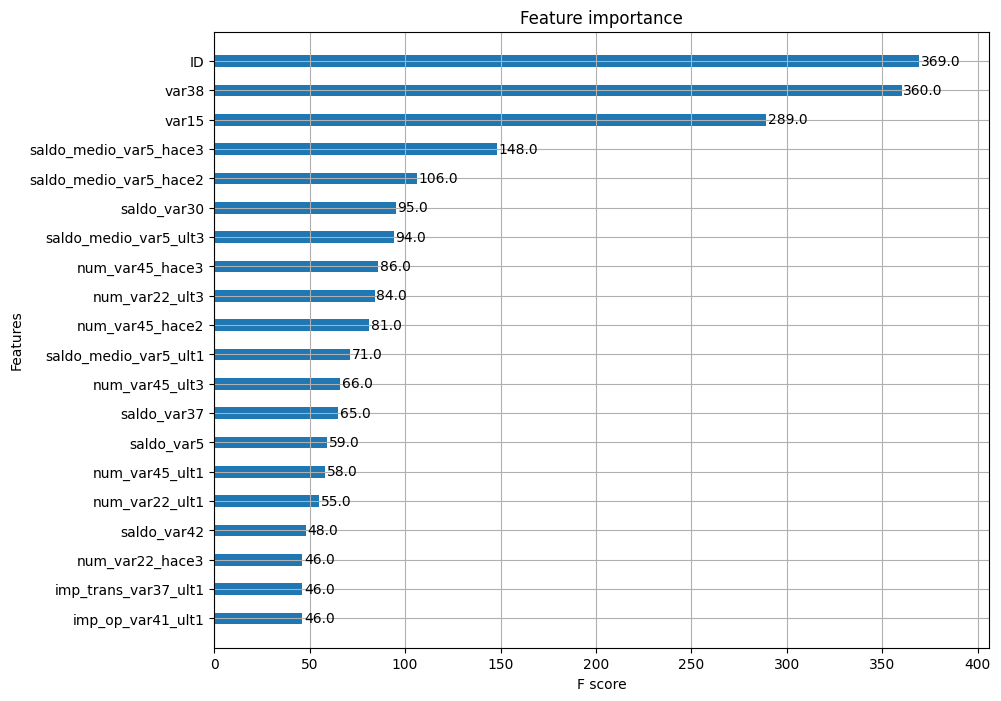

In [19]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline


fig, ax = plt.subplots(1,1, figsize=(10,8))
plot_importance(xgb_clf, ax=ax, max_num_features=20, height=0.4)

LightGBM  모델 학습과 하이퍼 파라미터 튜닝

In [23]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators = 500)

evals = [(X_test,y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds = 100, eval_metric='auc', eval_set = evals, verbose=True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.817877	valid_0's binary_logloss: 0.165052
[2]	valid_0's auc: 0.817879	valid_0's binary_logloss: 0.160075
[3]	valid_0's auc: 0.82723	valid_0's binary_logloss: 0.156418
[4]	valid_0's auc: 0.831084	valid_0's binary_logloss: 0.153598
[5]	valid_0's auc: 0.833542	valid_0's binary_logloss: 0.151396
[6]	valid_0's auc: 0.833045	valid_0's binary_logloss: 0.149583
[7]	valid_0's auc: 0.834596	valid_0's binary_logloss: 0.148134
[8]	valid_0's auc: 0.836232	valid_0's binary_logloss: 0.146835
[9]	valid_0's auc: 0.837247	valid_0's binary_logloss: 0.145888
[10]	valid_0's auc: 0.838312	valid_0's binary_logloss: 0.144884
[11]	valid_0's auc: 0.839099	valid_0's binary_logloss: 0.144052
[12]	valid_0's auc: 0.83924	valid_0's binary_logloss: 0.143418
[13]	valid_0's auc: 0.83934	valid_0's binary_logloss: 0.142902
[14]	valid_0's auc: 0.839012	valid_0's binary_logloss: 0.142465
[15]	valid_0's auc: 0.839228	valid_0's binary_logloss: 0.142037
[16]	valid_0's auc: 0.838888	valid_0's binary_loglos

In [24]:
from sklearn.model_selection import GridSearchCV

#하이퍼 파라미터 테스트의 수행 속도를 향상 시키기 위해 n_estimators를 200으로 감소
lgbm_clf = LGBMClassifier(n_estimators=200)


params = {'num_leaves' : [32,64],
          'max_depth' : [1218,160],
          'min_child_samples': [60,100],
          'subsample'  : [0.8,1]
}

#cv는 3으로 가정
gridcv = GridSearchCV(lgbm_clf, param_grid = params, cv=3)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric='auc', eval_set=[(X_train,y_train), (X_test, y_test)])

print('GridSearchCV 최적 파라미터:', gridcv.best_params_)
lgbm_roc_score = roc_auc_score(y_test,gridcv.predict_proba(X_test)[:, 1], average='macro')
print('ROC AUC :{0:.4f}'.format(lgbm_roc_score))

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.81963	valid_0's binary_logloss: 0.156025	valid_1's auc: 0.81308	valid_1's binary_logloss: 0.16495
[2]	valid_0's auc: 0.826141	valid_0's binary_logloss: 0.150827	valid_1's auc: 0.821657	valid_1's binary_logloss: 0.159822
[3]	valid_0's auc: 0.832848	valid_0's binary_logloss: 0.147058	valid_1's auc: 0.826046	valid_1's binary_logloss: 0.156367
[4]	valid_0's auc: 0.837589	valid_0's binary_logloss: 0.144115	valid_1's auc: 0.831748	valid_1's binary_logloss: 0.153567
[5]	valid_0's auc: 0.840136	valid_0's binary_logloss: 0.141624	valid_1's auc: 0.832861	valid_1's binary_logloss: 0.151388
[6]	valid_0's auc: 0.843032	valid_0's binary_logloss: 0.139569	valid_1's auc: 0.8344	valid_1's binary_logloss: 0.149461
[7]	valid_0's auc: 0.845555	valid_0's binary_logloss: 0.137899	valid_1's auc: 0.83603	valid_1's binary_logloss: 0.147731
[8]	valid_0's auc: 0.84818	valid_0's binary_logloss: 0.136459	valid_1's auc: 0.836753	valid_1's binary_logloss: 0.146558
[9]	valid_0's auc: 0.85065	vali

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.814078	valid_0's binary_logloss: 0.156415	valid_1's auc: 0.814149	valid_1's binary_logloss: 0.165291
[2]	valid_0's auc: 0.826006	valid_0's binary_logloss: 0.151083	valid_1's auc: 0.820025	valid_1's binary_logloss: 0.160134
[3]	valid_0's auc: 0.835903	valid_0's binary_logloss: 0.147254	valid_1's auc: 0.828415	valid_1's binary_logloss: 0.156393
[4]	valid_0's auc: 0.839027	valid_0's binary_logloss: 0.144252	valid_1's auc: 0.830681	valid_1's binary_logloss: 0.153518
[5]	valid_0's auc: 0.841889	valid_0's binary_logloss: 0.141822	valid_1's auc: 0.83388	valid_1's binary_logloss: 0.151305
[6]	valid_0's auc: 0.845755	valid_0's binary_logloss: 0.139734	valid_1's auc: 0.836819	valid_1's binary_logloss: 0.149295
[7]	valid_0's auc: 0.847836	valid_0's binary_logloss: 0.138031	valid_1's auc: 0.836339	valid_1's binary_logloss: 0.147761
[8]	valid_0's auc: 0.849745	valid_0's binary_logloss: 0.136596	valid_1's auc: 0.836593	valid_1's binary_logloss: 0.146549
[9]	valid_0's auc: 0.8513

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.821645	valid_0's binary_logloss: 0.156509	valid_1's auc: 0.818812	valid_1's binary_logloss: 0.165001
[2]	valid_0's auc: 0.827071	valid_0's binary_logloss: 0.151189	valid_1's auc: 0.821225	valid_1's binary_logloss: 0.160159
[3]	valid_0's auc: 0.837933	valid_0's binary_logloss: 0.147291	valid_1's auc: 0.829539	valid_1's binary_logloss: 0.1564
[4]	valid_0's auc: 0.840342	valid_0's binary_logloss: 0.144317	valid_1's auc: 0.831588	valid_1's binary_logloss: 0.153683
[5]	valid_0's auc: 0.842647	valid_0's binary_logloss: 0.141772	valid_1's auc: 0.832596	valid_1's binary_logloss: 0.151599
[6]	valid_0's auc: 0.843802	valid_0's binary_logloss: 0.139764	valid_1's auc: 0.833042	valid_1's binary_logloss: 0.149718
[7]	valid_0's auc: 0.845765	valid_0's binary_logloss: 0.138068	valid_1's auc: 0.834891	valid_1's binary_logloss: 0.148144
[8]	valid_0's auc: 0.847064	valid_0's binary_logloss: 0.136605	valid_1's auc: 0.835434	valid_1's binary_logloss: 0.146866
[9]	valid_0's auc: 0.84935

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.81963	valid_0's binary_logloss: 0.156025	valid_1's auc: 0.81308	valid_1's binary_logloss: 0.16495
[2]	valid_0's auc: 0.826141	valid_0's binary_logloss: 0.150827	valid_1's auc: 0.821657	valid_1's binary_logloss: 0.159822
[3]	valid_0's auc: 0.832848	valid_0's binary_logloss: 0.147058	valid_1's auc: 0.826046	valid_1's binary_logloss: 0.156367
[4]	valid_0's auc: 0.837589	valid_0's binary_logloss: 0.144115	valid_1's auc: 0.831748	valid_1's binary_logloss: 0.153567
[5]	valid_0's auc: 0.840136	valid_0's binary_logloss: 0.141624	valid_1's auc: 0.832861	valid_1's binary_logloss: 0.151388
[6]	valid_0's auc: 0.843032	valid_0's binary_logloss: 0.139569	valid_1's auc: 0.8344	valid_1's binary_logloss: 0.149461
[7]	valid_0's auc: 0.845555	valid_0's binary_logloss: 0.137899	valid_1's auc: 0.83603	valid_1's binary_logloss: 0.147731
[8]	valid_0's auc: 0.84818	valid_0's binary_logloss: 0.136459	valid_1's auc: 0.836753	valid_1's binary_logloss: 0.146558
[9]	valid_0's auc: 0.85065	vali

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.814078	valid_0's binary_logloss: 0.156415	valid_1's auc: 0.814149	valid_1's binary_logloss: 0.165291
[2]	valid_0's auc: 0.826006	valid_0's binary_logloss: 0.151083	valid_1's auc: 0.820025	valid_1's binary_logloss: 0.160134
[3]	valid_0's auc: 0.835903	valid_0's binary_logloss: 0.147254	valid_1's auc: 0.828415	valid_1's binary_logloss: 0.156393
[4]	valid_0's auc: 0.839027	valid_0's binary_logloss: 0.144252	valid_1's auc: 0.830681	valid_1's binary_logloss: 0.153518
[5]	valid_0's auc: 0.841889	valid_0's binary_logloss: 0.141822	valid_1's auc: 0.83388	valid_1's binary_logloss: 0.151305
[6]	valid_0's auc: 0.845755	valid_0's binary_logloss: 0.139734	valid_1's auc: 0.836819	valid_1's binary_logloss: 0.149295
[7]	valid_0's auc: 0.847836	valid_0's binary_logloss: 0.138031	valid_1's auc: 0.836339	valid_1's binary_logloss: 0.147761
[8]	valid_0's auc: 0.849745	valid_0's binary_logloss: 0.136596	valid_1's auc: 0.836593	valid_1's binary_logloss: 0.146549
[9]	valid_0's auc: 0.8513

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.821645	valid_0's binary_logloss: 0.156509	valid_1's auc: 0.818812	valid_1's binary_logloss: 0.165001
[2]	valid_0's auc: 0.827071	valid_0's binary_logloss: 0.151189	valid_1's auc: 0.821225	valid_1's binary_logloss: 0.160159
[3]	valid_0's auc: 0.837933	valid_0's binary_logloss: 0.147291	valid_1's auc: 0.829539	valid_1's binary_logloss: 0.1564
[4]	valid_0's auc: 0.840342	valid_0's binary_logloss: 0.144317	valid_1's auc: 0.831588	valid_1's binary_logloss: 0.153683
[5]	valid_0's auc: 0.842647	valid_0's binary_logloss: 0.141772	valid_1's auc: 0.832596	valid_1's binary_logloss: 0.151599
[6]	valid_0's auc: 0.843802	valid_0's binary_logloss: 0.139764	valid_1's auc: 0.833042	valid_1's binary_logloss: 0.149718
[7]	valid_0's auc: 0.845765	valid_0's binary_logloss: 0.138068	valid_1's auc: 0.834891	valid_1's binary_logloss: 0.148144
[8]	valid_0's auc: 0.847064	valid_0's binary_logloss: 0.136605	valid_1's auc: 0.835434	valid_1's binary_logloss: 0.146866
[9]	valid_0's auc: 0.84935

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.827598	valid_0's binary_logloss: 0.155248	valid_1's auc: 0.813183	valid_1's binary_logloss: 0.165214
[2]	valid_0's auc: 0.838016	valid_0's binary_logloss: 0.149612	valid_1's auc: 0.820035	valid_1's binary_logloss: 0.160268
[3]	valid_0's auc: 0.848064	valid_0's binary_logloss: 0.145434	valid_1's auc: 0.82558	valid_1's binary_logloss: 0.15658
[4]	valid_0's auc: 0.851589	valid_0's binary_logloss: 0.142175	valid_1's auc: 0.827912	valid_1's binary_logloss: 0.153781
[5]	valid_0's auc: 0.853871	valid_0's binary_logloss: 0.139498	valid_1's auc: 0.830287	valid_1's binary_logloss: 0.151539
[6]	valid_0's auc: 0.857666	valid_0's binary_logloss: 0.137257	valid_1's auc: 0.832755	valid_1's binary_logloss: 0.149761
[7]	valid_0's auc: 0.859967	valid_0's binary_logloss: 0.13531	valid_1's auc: 0.83251	valid_1's binary_logloss: 0.148295
[8]	valid_0's auc: 0.861841	valid_0's binary_logloss: 0.133669	valid_1's auc: 0.832407	valid_1's binary_logloss: 0.147059
[9]	valid_0's auc: 0.864329	

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.829472	valid_0's binary_logloss: 0.155545	valid_1's auc: 0.816092	valid_1's binary_logloss: 0.165244
[2]	valid_0's auc: 0.840625	valid_0's binary_logloss: 0.149669	valid_1's auc: 0.822866	valid_1's binary_logloss: 0.159737
[3]	valid_0's auc: 0.850538	valid_0's binary_logloss: 0.145443	valid_1's auc: 0.8306	valid_1's binary_logloss: 0.156125
[4]	valid_0's auc: 0.855043	valid_0's binary_logloss: 0.142148	valid_1's auc: 0.832726	valid_1's binary_logloss: 0.15314
[5]	valid_0's auc: 0.858143	valid_0's binary_logloss: 0.139485	valid_1's auc: 0.835471	valid_1's binary_logloss: 0.150756
[6]	valid_0's auc: 0.861035	valid_0's binary_logloss: 0.13716	valid_1's auc: 0.834619	valid_1's binary_logloss: 0.149013
[7]	valid_0's auc: 0.862666	valid_0's binary_logloss: 0.135257	valid_1's auc: 0.835579	valid_1's binary_logloss: 0.147415
[8]	valid_0's auc: 0.864647	valid_0's binary_logloss: 0.133535	valid_1's auc: 0.836226	valid_1's binary_logloss: 0.1462
[9]	valid_0's auc: 0.866545	va

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.826945	valid_0's binary_logloss: 0.155619	valid_1's auc: 0.81279	valid_1's binary_logloss: 0.164547
[2]	valid_0's auc: 0.835553	valid_0's binary_logloss: 0.149799	valid_1's auc: 0.822636	valid_1's binary_logloss: 0.159415
[3]	valid_0's auc: 0.846807	valid_0's binary_logloss: 0.145525	valid_1's auc: 0.832102	valid_1's binary_logloss: 0.15567
[4]	valid_0's auc: 0.85189	valid_0's binary_logloss: 0.142171	valid_1's auc: 0.83311	valid_1's binary_logloss: 0.152819
[5]	valid_0's auc: 0.855295	valid_0's binary_logloss: 0.139396	valid_1's auc: 0.836082	valid_1's binary_logloss: 0.150545
[6]	valid_0's auc: 0.857735	valid_0's binary_logloss: 0.137088	valid_1's auc: 0.834953	valid_1's binary_logloss: 0.14874
[7]	valid_0's auc: 0.859421	valid_0's binary_logloss: 0.135162	valid_1's auc: 0.834882	valid_1's binary_logloss: 0.147191
[8]	valid_0's auc: 0.861284	valid_0's binary_logloss: 0.133562	valid_1's auc: 0.836322	valid_1's binary_logloss: 0.145833
[9]	valid_0's auc: 0.864459	v

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.827598	valid_0's binary_logloss: 0.155248	valid_1's auc: 0.813183	valid_1's binary_logloss: 0.165214
[2]	valid_0's auc: 0.838016	valid_0's binary_logloss: 0.149612	valid_1's auc: 0.820035	valid_1's binary_logloss: 0.160268
[3]	valid_0's auc: 0.848064	valid_0's binary_logloss: 0.145434	valid_1's auc: 0.82558	valid_1's binary_logloss: 0.15658
[4]	valid_0's auc: 0.851589	valid_0's binary_logloss: 0.142175	valid_1's auc: 0.827912	valid_1's binary_logloss: 0.153781
[5]	valid_0's auc: 0.853871	valid_0's binary_logloss: 0.139498	valid_1's auc: 0.830287	valid_1's binary_logloss: 0.151539
[6]	valid_0's auc: 0.857666	valid_0's binary_logloss: 0.137257	valid_1's auc: 0.832755	valid_1's binary_logloss: 0.149761
[7]	valid_0's auc: 0.859967	valid_0's binary_logloss: 0.13531	valid_1's auc: 0.83251	valid_1's binary_logloss: 0.148295
[8]	valid_0's auc: 0.861841	valid_0's binary_logloss: 0.133669	valid_1's auc: 0.832407	valid_1's binary_logloss: 0.147059
[9]	valid_0's auc: 0.864329	

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.829472	valid_0's binary_logloss: 0.155545	valid_1's auc: 0.816092	valid_1's binary_logloss: 0.165244
[2]	valid_0's auc: 0.840625	valid_0's binary_logloss: 0.149669	valid_1's auc: 0.822866	valid_1's binary_logloss: 0.159737
[3]	valid_0's auc: 0.850538	valid_0's binary_logloss: 0.145443	valid_1's auc: 0.8306	valid_1's binary_logloss: 0.156125
[4]	valid_0's auc: 0.855043	valid_0's binary_logloss: 0.142148	valid_1's auc: 0.832726	valid_1's binary_logloss: 0.15314
[5]	valid_0's auc: 0.858143	valid_0's binary_logloss: 0.139485	valid_1's auc: 0.835471	valid_1's binary_logloss: 0.150756
[6]	valid_0's auc: 0.861035	valid_0's binary_logloss: 0.13716	valid_1's auc: 0.834619	valid_1's binary_logloss: 0.149013
[7]	valid_0's auc: 0.862666	valid_0's binary_logloss: 0.135257	valid_1's auc: 0.835579	valid_1's binary_logloss: 0.147415
[8]	valid_0's auc: 0.864647	valid_0's binary_logloss: 0.133535	valid_1's auc: 0.836226	valid_1's binary_logloss: 0.1462
[9]	valid_0's auc: 0.866545	va

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.826945	valid_0's binary_logloss: 0.155619	valid_1's auc: 0.81279	valid_1's binary_logloss: 0.164547
[2]	valid_0's auc: 0.835553	valid_0's binary_logloss: 0.149799	valid_1's auc: 0.822636	valid_1's binary_logloss: 0.159415
[3]	valid_0's auc: 0.846807	valid_0's binary_logloss: 0.145525	valid_1's auc: 0.832102	valid_1's binary_logloss: 0.15567
[4]	valid_0's auc: 0.85189	valid_0's binary_logloss: 0.142171	valid_1's auc: 0.83311	valid_1's binary_logloss: 0.152819
[5]	valid_0's auc: 0.855295	valid_0's binary_logloss: 0.139396	valid_1's auc: 0.836082	valid_1's binary_logloss: 0.150545
[6]	valid_0's auc: 0.857735	valid_0's binary_logloss: 0.137088	valid_1's auc: 0.834953	valid_1's binary_logloss: 0.14874
[7]	valid_0's auc: 0.859421	valid_0's binary_logloss: 0.135162	valid_1's auc: 0.834882	valid_1's binary_logloss: 0.147191
[8]	valid_0's auc: 0.861284	valid_0's binary_logloss: 0.133562	valid_1's auc: 0.836322	valid_1's binary_logloss: 0.145833
[9]	valid_0's auc: 0.864459	v

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.824468	valid_0's binary_logloss: 0.15623	valid_1's auc: 0.817457	valid_1's binary_logloss: 0.165186
[2]	valid_0's auc: 0.827306	valid_0's binary_logloss: 0.151247	valid_1's auc: 0.820454	valid_1's binary_logloss: 0.160216
[3]	valid_0's auc: 0.83375	valid_0's binary_logloss: 0.147405	valid_1's auc: 0.826852	valid_1's binary_logloss: 0.156503
[4]	valid_0's auc: 0.838345	valid_0's binary_logloss: 0.144406	valid_1's auc: 0.831146	valid_1's binary_logloss: 0.153766
[5]	valid_0's auc: 0.840563	valid_0's binary_logloss: 0.141976	valid_1's auc: 0.83323	valid_1's binary_logloss: 0.151413
[6]	valid_0's auc: 0.844868	valid_0's binary_logloss: 0.139971	valid_1's auc: 0.835162	valid_1's binary_logloss: 0.149558
[7]	valid_0's auc: 0.84655	valid_0's binary_logloss: 0.138346	valid_1's auc: 0.83474	valid_1's binary_logloss: 0.14803
[8]	valid_0's auc: 0.847538	valid_0's binary_logloss: 0.136943	valid_1's auc: 0.836177	valid_1's binary_logloss: 0.146734
[9]	valid_0's auc: 0.848539	va

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.821478	valid_0's binary_logloss: 0.156416	valid_1's auc: 0.81758	valid_1's binary_logloss: 0.165274
[2]	valid_0's auc: 0.828233	valid_0's binary_logloss: 0.151131	valid_1's auc: 0.821559	valid_1's binary_logloss: 0.159903
[3]	valid_0's auc: 0.837634	valid_0's binary_logloss: 0.147243	valid_1's auc: 0.829985	valid_1's binary_logloss: 0.156283
[4]	valid_0's auc: 0.842023	valid_0's binary_logloss: 0.14431	valid_1's auc: 0.832114	valid_1's binary_logloss: 0.153365
[5]	valid_0's auc: 0.846482	valid_0's binary_logloss: 0.141885	valid_1's auc: 0.837897	valid_1's binary_logloss: 0.151015
[6]	valid_0's auc: 0.848049	valid_0's binary_logloss: 0.139898	valid_1's auc: 0.838134	valid_1's binary_logloss: 0.149189
[7]	valid_0's auc: 0.850193	valid_0's binary_logloss: 0.138192	valid_1's auc: 0.838504	valid_1's binary_logloss: 0.147586
[8]	valid_0's auc: 0.852056	valid_0's binary_logloss: 0.136737	valid_1's auc: 0.838066	valid_1's binary_logloss: 0.14645
[9]	valid_0's auc: 0.853278

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.821681	valid_0's binary_logloss: 0.156556	valid_1's auc: 0.816533	valid_1's binary_logloss: 0.165362
[2]	valid_0's auc: 0.828025	valid_0's binary_logloss: 0.1513	valid_1's auc: 0.819961	valid_1's binary_logloss: 0.160346
[3]	valid_0's auc: 0.837814	valid_0's binary_logloss: 0.14743	valid_1's auc: 0.828982	valid_1's binary_logloss: 0.156653
[4]	valid_0's auc: 0.840798	valid_0's binary_logloss: 0.144402	valid_1's auc: 0.831553	valid_1's binary_logloss: 0.15361
[5]	valid_0's auc: 0.841946	valid_0's binary_logloss: 0.142052	valid_1's auc: 0.833644	valid_1's binary_logloss: 0.151444
[6]	valid_0's auc: 0.843679	valid_0's binary_logloss: 0.140134	valid_1's auc: 0.834011	valid_1's binary_logloss: 0.14958
[7]	valid_0's auc: 0.845328	valid_0's binary_logloss: 0.138384	valid_1's auc: 0.834433	valid_1's binary_logloss: 0.148097
[8]	valid_0's auc: 0.847507	valid_0's binary_logloss: 0.136982	valid_1's auc: 0.835453	valid_1's binary_logloss: 0.146925
[9]	valid_0's auc: 0.848994	v

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.824468	valid_0's binary_logloss: 0.15623	valid_1's auc: 0.817457	valid_1's binary_logloss: 0.165186
[2]	valid_0's auc: 0.827306	valid_0's binary_logloss: 0.151247	valid_1's auc: 0.820454	valid_1's binary_logloss: 0.160216
[3]	valid_0's auc: 0.83375	valid_0's binary_logloss: 0.147405	valid_1's auc: 0.826852	valid_1's binary_logloss: 0.156503
[4]	valid_0's auc: 0.838345	valid_0's binary_logloss: 0.144406	valid_1's auc: 0.831146	valid_1's binary_logloss: 0.153766
[5]	valid_0's auc: 0.840563	valid_0's binary_logloss: 0.141976	valid_1's auc: 0.83323	valid_1's binary_logloss: 0.151413
[6]	valid_0's auc: 0.844868	valid_0's binary_logloss: 0.139971	valid_1's auc: 0.835162	valid_1's binary_logloss: 0.149558
[7]	valid_0's auc: 0.84655	valid_0's binary_logloss: 0.138346	valid_1's auc: 0.83474	valid_1's binary_logloss: 0.14803
[8]	valid_0's auc: 0.847538	valid_0's binary_logloss: 0.136943	valid_1's auc: 0.836177	valid_1's binary_logloss: 0.146734
[9]	valid_0's auc: 0.848539	va

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.821478	valid_0's binary_logloss: 0.156416	valid_1's auc: 0.81758	valid_1's binary_logloss: 0.165274
[2]	valid_0's auc: 0.828233	valid_0's binary_logloss: 0.151131	valid_1's auc: 0.821559	valid_1's binary_logloss: 0.159903
[3]	valid_0's auc: 0.837634	valid_0's binary_logloss: 0.147243	valid_1's auc: 0.829985	valid_1's binary_logloss: 0.156283
[4]	valid_0's auc: 0.842023	valid_0's binary_logloss: 0.14431	valid_1's auc: 0.832114	valid_1's binary_logloss: 0.153365
[5]	valid_0's auc: 0.846482	valid_0's binary_logloss: 0.141885	valid_1's auc: 0.837897	valid_1's binary_logloss: 0.151015
[6]	valid_0's auc: 0.848049	valid_0's binary_logloss: 0.139898	valid_1's auc: 0.838134	valid_1's binary_logloss: 0.149189
[7]	valid_0's auc: 0.850193	valid_0's binary_logloss: 0.138192	valid_1's auc: 0.838504	valid_1's binary_logloss: 0.147586
[8]	valid_0's auc: 0.852056	valid_0's binary_logloss: 0.136737	valid_1's auc: 0.838066	valid_1's binary_logloss: 0.14645
[9]	valid_0's auc: 0.853278

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.821681	valid_0's binary_logloss: 0.156556	valid_1's auc: 0.816533	valid_1's binary_logloss: 0.165362
[2]	valid_0's auc: 0.828025	valid_0's binary_logloss: 0.1513	valid_1's auc: 0.819961	valid_1's binary_logloss: 0.160346
[3]	valid_0's auc: 0.837814	valid_0's binary_logloss: 0.14743	valid_1's auc: 0.828982	valid_1's binary_logloss: 0.156653
[4]	valid_0's auc: 0.840798	valid_0's binary_logloss: 0.144402	valid_1's auc: 0.831553	valid_1's binary_logloss: 0.15361
[5]	valid_0's auc: 0.841946	valid_0's binary_logloss: 0.142052	valid_1's auc: 0.833644	valid_1's binary_logloss: 0.151444
[6]	valid_0's auc: 0.843679	valid_0's binary_logloss: 0.140134	valid_1's auc: 0.834011	valid_1's binary_logloss: 0.14958
[7]	valid_0's auc: 0.845328	valid_0's binary_logloss: 0.138384	valid_1's auc: 0.834433	valid_1's binary_logloss: 0.148097
[8]	valid_0's auc: 0.847507	valid_0's binary_logloss: 0.136982	valid_1's auc: 0.835453	valid_1's binary_logloss: 0.146925
[9]	valid_0's auc: 0.848994	v

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.829775	valid_0's binary_logloss: 0.155684	valid_1's auc: 0.815414	valid_1's binary_logloss: 0.164933
[2]	valid_0's auc: 0.835265	valid_0's binary_logloss: 0.150281	valid_1's auc: 0.816743	valid_1's binary_logloss: 0.160352
[3]	valid_0's auc: 0.84568	valid_0's binary_logloss: 0.146118	valid_1's auc: 0.825978	valid_1's binary_logloss: 0.156479
[4]	valid_0's auc: 0.848953	valid_0's binary_logloss: 0.14285	valid_1's auc: 0.828883	valid_1's binary_logloss: 0.15354
[5]	valid_0's auc: 0.851761	valid_0's binary_logloss: 0.140163	valid_1's auc: 0.829933	valid_1's binary_logloss: 0.151372
[6]	valid_0's auc: 0.855298	valid_0's binary_logloss: 0.137979	valid_1's auc: 0.833577	valid_1's binary_logloss: 0.149529
[7]	valid_0's auc: 0.858755	valid_0's binary_logloss: 0.136039	valid_1's auc: 0.833221	valid_1's binary_logloss: 0.148135
[8]	valid_0's auc: 0.861115	valid_0's binary_logloss: 0.134455	valid_1's auc: 0.832706	valid_1's binary_logloss: 0.146944
[9]	valid_0's auc: 0.863222

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.828233	valid_0's binary_logloss: 0.155753	valid_1's auc: 0.818814	valid_1's binary_logloss: 0.165092
[2]	valid_0's auc: 0.841159	valid_0's binary_logloss: 0.150154	valid_1's auc: 0.828236	valid_1's binary_logloss: 0.159795
[3]	valid_0's auc: 0.848187	valid_0's binary_logloss: 0.14613	valid_1's auc: 0.831487	valid_1's binary_logloss: 0.156258
[4]	valid_0's auc: 0.853007	valid_0's binary_logloss: 0.142877	valid_1's auc: 0.834135	valid_1's binary_logloss: 0.153255
[5]	valid_0's auc: 0.856154	valid_0's binary_logloss: 0.140252	valid_1's auc: 0.83627	valid_1's binary_logloss: 0.150799
[6]	valid_0's auc: 0.859489	valid_0's binary_logloss: 0.138043	valid_1's auc: 0.83628	valid_1's binary_logloss: 0.14903
[7]	valid_0's auc: 0.861784	valid_0's binary_logloss: 0.136049	valid_1's auc: 0.837339	valid_1's binary_logloss: 0.147392
[8]	valid_0's auc: 0.863667	valid_0's binary_logloss: 0.134403	valid_1's auc: 0.837939	valid_1's binary_logloss: 0.146105
[9]	valid_0's auc: 0.865138	

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.831261	valid_0's binary_logloss: 0.155963	valid_1's auc: 0.818855	valid_1's binary_logloss: 0.165108
[2]	valid_0's auc: 0.840251	valid_0's binary_logloss: 0.150254	valid_1's auc: 0.825786	valid_1's binary_logloss: 0.159891
[3]	valid_0's auc: 0.845921	valid_0's binary_logloss: 0.146109	valid_1's auc: 0.830182	valid_1's binary_logloss: 0.156019
[4]	valid_0's auc: 0.850965	valid_0's binary_logloss: 0.142831	valid_1's auc: 0.832601	valid_1's binary_logloss: 0.153144
[5]	valid_0's auc: 0.853416	valid_0's binary_logloss: 0.140221	valid_1's auc: 0.834064	valid_1's binary_logloss: 0.150895
[6]	valid_0's auc: 0.854937	valid_0's binary_logloss: 0.138014	valid_1's auc: 0.835453	valid_1's binary_logloss: 0.148919
[7]	valid_0's auc: 0.856946	valid_0's binary_logloss: 0.136106	valid_1's auc: 0.834308	valid_1's binary_logloss: 0.147488
[8]	valid_0's auc: 0.859033	valid_0's binary_logloss: 0.134412	valid_1's auc: 0.834955	valid_1's binary_logloss: 0.146158
[9]	valid_0's auc: 0.862

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.829775	valid_0's binary_logloss: 0.155684	valid_1's auc: 0.815414	valid_1's binary_logloss: 0.164933
[2]	valid_0's auc: 0.835265	valid_0's binary_logloss: 0.150281	valid_1's auc: 0.816743	valid_1's binary_logloss: 0.160352
[3]	valid_0's auc: 0.84568	valid_0's binary_logloss: 0.146118	valid_1's auc: 0.825978	valid_1's binary_logloss: 0.156479
[4]	valid_0's auc: 0.848953	valid_0's binary_logloss: 0.14285	valid_1's auc: 0.828883	valid_1's binary_logloss: 0.15354
[5]	valid_0's auc: 0.851761	valid_0's binary_logloss: 0.140163	valid_1's auc: 0.829933	valid_1's binary_logloss: 0.151372
[6]	valid_0's auc: 0.855298	valid_0's binary_logloss: 0.137979	valid_1's auc: 0.833577	valid_1's binary_logloss: 0.149529
[7]	valid_0's auc: 0.858755	valid_0's binary_logloss: 0.136039	valid_1's auc: 0.833221	valid_1's binary_logloss: 0.148135
[8]	valid_0's auc: 0.861115	valid_0's binary_logloss: 0.134455	valid_1's auc: 0.832706	valid_1's binary_logloss: 0.146944
[9]	valid_0's auc: 0.863222

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.828233	valid_0's binary_logloss: 0.155753	valid_1's auc: 0.818814	valid_1's binary_logloss: 0.165092
[2]	valid_0's auc: 0.841159	valid_0's binary_logloss: 0.150154	valid_1's auc: 0.828236	valid_1's binary_logloss: 0.159795
[3]	valid_0's auc: 0.848187	valid_0's binary_logloss: 0.14613	valid_1's auc: 0.831487	valid_1's binary_logloss: 0.156258
[4]	valid_0's auc: 0.853007	valid_0's binary_logloss: 0.142877	valid_1's auc: 0.834135	valid_1's binary_logloss: 0.153255
[5]	valid_0's auc: 0.856154	valid_0's binary_logloss: 0.140252	valid_1's auc: 0.83627	valid_1's binary_logloss: 0.150799
[6]	valid_0's auc: 0.859489	valid_0's binary_logloss: 0.138043	valid_1's auc: 0.83628	valid_1's binary_logloss: 0.14903
[7]	valid_0's auc: 0.861784	valid_0's binary_logloss: 0.136049	valid_1's auc: 0.837339	valid_1's binary_logloss: 0.147392
[8]	valid_0's auc: 0.863667	valid_0's binary_logloss: 0.134403	valid_1's auc: 0.837939	valid_1's binary_logloss: 0.146105
[9]	valid_0's auc: 0.865138	

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.831261	valid_0's binary_logloss: 0.155963	valid_1's auc: 0.818855	valid_1's binary_logloss: 0.165108
[2]	valid_0's auc: 0.840251	valid_0's binary_logloss: 0.150254	valid_1's auc: 0.825786	valid_1's binary_logloss: 0.159891
[3]	valid_0's auc: 0.845921	valid_0's binary_logloss: 0.146109	valid_1's auc: 0.830182	valid_1's binary_logloss: 0.156019
[4]	valid_0's auc: 0.850965	valid_0's binary_logloss: 0.142831	valid_1's auc: 0.832601	valid_1's binary_logloss: 0.153144
[5]	valid_0's auc: 0.853416	valid_0's binary_logloss: 0.140221	valid_1's auc: 0.834064	valid_1's binary_logloss: 0.150895
[6]	valid_0's auc: 0.854937	valid_0's binary_logloss: 0.138014	valid_1's auc: 0.835453	valid_1's binary_logloss: 0.148919
[7]	valid_0's auc: 0.856946	valid_0's binary_logloss: 0.136106	valid_1's auc: 0.834308	valid_1's binary_logloss: 0.147488
[8]	valid_0's auc: 0.859033	valid_0's binary_logloss: 0.134412	valid_1's auc: 0.834955	valid_1's binary_logloss: 0.146158
[9]	valid_0's auc: 0.862

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.81963	valid_0's binary_logloss: 0.156025	valid_1's auc: 0.81308	valid_1's binary_logloss: 0.16495
[2]	valid_0's auc: 0.826141	valid_0's binary_logloss: 0.150827	valid_1's auc: 0.821657	valid_1's binary_logloss: 0.159822
[3]	valid_0's auc: 0.832848	valid_0's binary_logloss: 0.147058	valid_1's auc: 0.826046	valid_1's binary_logloss: 0.156367
[4]	valid_0's auc: 0.837589	valid_0's binary_logloss: 0.144115	valid_1's auc: 0.831748	valid_1's binary_logloss: 0.153567
[5]	valid_0's auc: 0.840136	valid_0's binary_logloss: 0.141624	valid_1's auc: 0.832861	valid_1's binary_logloss: 0.151388
[6]	valid_0's auc: 0.843032	valid_0's binary_logloss: 0.139569	valid_1's auc: 0.8344	valid_1's binary_logloss: 0.149461
[7]	valid_0's auc: 0.845555	valid_0's binary_logloss: 0.137899	valid_1's auc: 0.83603	valid_1's binary_logloss: 0.147731
[8]	valid_0's auc: 0.84818	valid_0's binary_logloss: 0.136459	valid_1's auc: 0.836753	valid_1's binary_logloss: 0.146558
[9]	valid_0's auc: 0.85065	vali

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.814078	valid_0's binary_logloss: 0.156415	valid_1's auc: 0.814149	valid_1's binary_logloss: 0.165291
[2]	valid_0's auc: 0.826006	valid_0's binary_logloss: 0.151083	valid_1's auc: 0.820025	valid_1's binary_logloss: 0.160134
[3]	valid_0's auc: 0.835903	valid_0's binary_logloss: 0.147254	valid_1's auc: 0.828415	valid_1's binary_logloss: 0.156393
[4]	valid_0's auc: 0.839027	valid_0's binary_logloss: 0.144252	valid_1's auc: 0.830681	valid_1's binary_logloss: 0.153518
[5]	valid_0's auc: 0.841889	valid_0's binary_logloss: 0.141822	valid_1's auc: 0.83388	valid_1's binary_logloss: 0.151305
[6]	valid_0's auc: 0.845755	valid_0's binary_logloss: 0.139734	valid_1's auc: 0.836819	valid_1's binary_logloss: 0.149295
[7]	valid_0's auc: 0.847836	valid_0's binary_logloss: 0.138031	valid_1's auc: 0.836339	valid_1's binary_logloss: 0.147761
[8]	valid_0's auc: 0.849745	valid_0's binary_logloss: 0.136596	valid_1's auc: 0.836593	valid_1's binary_logloss: 0.146549
[9]	valid_0's auc: 0.8513

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.821645	valid_0's binary_logloss: 0.156509	valid_1's auc: 0.818812	valid_1's binary_logloss: 0.165001
[2]	valid_0's auc: 0.827071	valid_0's binary_logloss: 0.151189	valid_1's auc: 0.821225	valid_1's binary_logloss: 0.160159
[3]	valid_0's auc: 0.837933	valid_0's binary_logloss: 0.147291	valid_1's auc: 0.829539	valid_1's binary_logloss: 0.1564
[4]	valid_0's auc: 0.840342	valid_0's binary_logloss: 0.144317	valid_1's auc: 0.831588	valid_1's binary_logloss: 0.153683
[5]	valid_0's auc: 0.842647	valid_0's binary_logloss: 0.141772	valid_1's auc: 0.832596	valid_1's binary_logloss: 0.151599
[6]	valid_0's auc: 0.843802	valid_0's binary_logloss: 0.139764	valid_1's auc: 0.833042	valid_1's binary_logloss: 0.149718
[7]	valid_0's auc: 0.845765	valid_0's binary_logloss: 0.138068	valid_1's auc: 0.834891	valid_1's binary_logloss: 0.148144
[8]	valid_0's auc: 0.847064	valid_0's binary_logloss: 0.136605	valid_1's auc: 0.835434	valid_1's binary_logloss: 0.146866
[9]	valid_0's auc: 0.84935

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.81963	valid_0's binary_logloss: 0.156025	valid_1's auc: 0.81308	valid_1's binary_logloss: 0.16495
[2]	valid_0's auc: 0.826141	valid_0's binary_logloss: 0.150827	valid_1's auc: 0.821657	valid_1's binary_logloss: 0.159822
[3]	valid_0's auc: 0.832848	valid_0's binary_logloss: 0.147058	valid_1's auc: 0.826046	valid_1's binary_logloss: 0.156367
[4]	valid_0's auc: 0.837589	valid_0's binary_logloss: 0.144115	valid_1's auc: 0.831748	valid_1's binary_logloss: 0.153567
[5]	valid_0's auc: 0.840136	valid_0's binary_logloss: 0.141624	valid_1's auc: 0.832861	valid_1's binary_logloss: 0.151388
[6]	valid_0's auc: 0.843032	valid_0's binary_logloss: 0.139569	valid_1's auc: 0.8344	valid_1's binary_logloss: 0.149461
[7]	valid_0's auc: 0.845555	valid_0's binary_logloss: 0.137899	valid_1's auc: 0.83603	valid_1's binary_logloss: 0.147731
[8]	valid_0's auc: 0.84818	valid_0's binary_logloss: 0.136459	valid_1's auc: 0.836753	valid_1's binary_logloss: 0.146558
[9]	valid_0's auc: 0.85065	vali

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.814078	valid_0's binary_logloss: 0.156415	valid_1's auc: 0.814149	valid_1's binary_logloss: 0.165291
[2]	valid_0's auc: 0.826006	valid_0's binary_logloss: 0.151083	valid_1's auc: 0.820025	valid_1's binary_logloss: 0.160134
[3]	valid_0's auc: 0.835903	valid_0's binary_logloss: 0.147254	valid_1's auc: 0.828415	valid_1's binary_logloss: 0.156393
[4]	valid_0's auc: 0.839027	valid_0's binary_logloss: 0.144252	valid_1's auc: 0.830681	valid_1's binary_logloss: 0.153518
[5]	valid_0's auc: 0.841889	valid_0's binary_logloss: 0.141822	valid_1's auc: 0.83388	valid_1's binary_logloss: 0.151305
[6]	valid_0's auc: 0.845755	valid_0's binary_logloss: 0.139734	valid_1's auc: 0.836819	valid_1's binary_logloss: 0.149295
[7]	valid_0's auc: 0.847836	valid_0's binary_logloss: 0.138031	valid_1's auc: 0.836339	valid_1's binary_logloss: 0.147761
[8]	valid_0's auc: 0.849745	valid_0's binary_logloss: 0.136596	valid_1's auc: 0.836593	valid_1's binary_logloss: 0.146549
[9]	valid_0's auc: 0.8513

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.821645	valid_0's binary_logloss: 0.156509	valid_1's auc: 0.818812	valid_1's binary_logloss: 0.165001
[2]	valid_0's auc: 0.827071	valid_0's binary_logloss: 0.151189	valid_1's auc: 0.821225	valid_1's binary_logloss: 0.160159
[3]	valid_0's auc: 0.837933	valid_0's binary_logloss: 0.147291	valid_1's auc: 0.829539	valid_1's binary_logloss: 0.1564
[4]	valid_0's auc: 0.840342	valid_0's binary_logloss: 0.144317	valid_1's auc: 0.831588	valid_1's binary_logloss: 0.153683
[5]	valid_0's auc: 0.842647	valid_0's binary_logloss: 0.141772	valid_1's auc: 0.832596	valid_1's binary_logloss: 0.151599
[6]	valid_0's auc: 0.843802	valid_0's binary_logloss: 0.139764	valid_1's auc: 0.833042	valid_1's binary_logloss: 0.149718
[7]	valid_0's auc: 0.845765	valid_0's binary_logloss: 0.138068	valid_1's auc: 0.834891	valid_1's binary_logloss: 0.148144
[8]	valid_0's auc: 0.847064	valid_0's binary_logloss: 0.136605	valid_1's auc: 0.835434	valid_1's binary_logloss: 0.146866
[9]	valid_0's auc: 0.84935

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.827598	valid_0's binary_logloss: 0.155248	valid_1's auc: 0.813183	valid_1's binary_logloss: 0.165214
[2]	valid_0's auc: 0.838016	valid_0's binary_logloss: 0.149612	valid_1's auc: 0.820035	valid_1's binary_logloss: 0.160268
[3]	valid_0's auc: 0.848064	valid_0's binary_logloss: 0.145434	valid_1's auc: 0.82558	valid_1's binary_logloss: 0.15658
[4]	valid_0's auc: 0.851589	valid_0's binary_logloss: 0.142175	valid_1's auc: 0.827912	valid_1's binary_logloss: 0.153781
[5]	valid_0's auc: 0.853871	valid_0's binary_logloss: 0.139498	valid_1's auc: 0.830287	valid_1's binary_logloss: 0.151539
[6]	valid_0's auc: 0.857666	valid_0's binary_logloss: 0.137257	valid_1's auc: 0.832755	valid_1's binary_logloss: 0.149761
[7]	valid_0's auc: 0.859967	valid_0's binary_logloss: 0.13531	valid_1's auc: 0.83251	valid_1's binary_logloss: 0.148295
[8]	valid_0's auc: 0.861841	valid_0's binary_logloss: 0.133669	valid_1's auc: 0.832407	valid_1's binary_logloss: 0.147059
[9]	valid_0's auc: 0.864329	

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.829472	valid_0's binary_logloss: 0.155545	valid_1's auc: 0.816092	valid_1's binary_logloss: 0.165244
[2]	valid_0's auc: 0.840625	valid_0's binary_logloss: 0.149669	valid_1's auc: 0.822866	valid_1's binary_logloss: 0.159737
[3]	valid_0's auc: 0.850538	valid_0's binary_logloss: 0.145443	valid_1's auc: 0.8306	valid_1's binary_logloss: 0.156125
[4]	valid_0's auc: 0.855043	valid_0's binary_logloss: 0.142148	valid_1's auc: 0.832726	valid_1's binary_logloss: 0.15314
[5]	valid_0's auc: 0.858143	valid_0's binary_logloss: 0.139485	valid_1's auc: 0.835471	valid_1's binary_logloss: 0.150756
[6]	valid_0's auc: 0.861035	valid_0's binary_logloss: 0.13716	valid_1's auc: 0.834619	valid_1's binary_logloss: 0.149013
[7]	valid_0's auc: 0.862666	valid_0's binary_logloss: 0.135257	valid_1's auc: 0.835579	valid_1's binary_logloss: 0.147415
[8]	valid_0's auc: 0.864647	valid_0's binary_logloss: 0.133535	valid_1's auc: 0.836226	valid_1's binary_logloss: 0.1462
[9]	valid_0's auc: 0.866545	va

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.826945	valid_0's binary_logloss: 0.155619	valid_1's auc: 0.81279	valid_1's binary_logloss: 0.164547
[2]	valid_0's auc: 0.835553	valid_0's binary_logloss: 0.149799	valid_1's auc: 0.822636	valid_1's binary_logloss: 0.159415
[3]	valid_0's auc: 0.846807	valid_0's binary_logloss: 0.145525	valid_1's auc: 0.832102	valid_1's binary_logloss: 0.15567
[4]	valid_0's auc: 0.85189	valid_0's binary_logloss: 0.142171	valid_1's auc: 0.83311	valid_1's binary_logloss: 0.152819
[5]	valid_0's auc: 0.855295	valid_0's binary_logloss: 0.139396	valid_1's auc: 0.836082	valid_1's binary_logloss: 0.150545
[6]	valid_0's auc: 0.857735	valid_0's binary_logloss: 0.137088	valid_1's auc: 0.834953	valid_1's binary_logloss: 0.14874
[7]	valid_0's auc: 0.859421	valid_0's binary_logloss: 0.135162	valid_1's auc: 0.834882	valid_1's binary_logloss: 0.147191
[8]	valid_0's auc: 0.861284	valid_0's binary_logloss: 0.133562	valid_1's auc: 0.836322	valid_1's binary_logloss: 0.145833
[9]	valid_0's auc: 0.864459	v

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.827598	valid_0's binary_logloss: 0.155248	valid_1's auc: 0.813183	valid_1's binary_logloss: 0.165214
[2]	valid_0's auc: 0.838016	valid_0's binary_logloss: 0.149612	valid_1's auc: 0.820035	valid_1's binary_logloss: 0.160268
[3]	valid_0's auc: 0.848064	valid_0's binary_logloss: 0.145434	valid_1's auc: 0.82558	valid_1's binary_logloss: 0.15658
[4]	valid_0's auc: 0.851589	valid_0's binary_logloss: 0.142175	valid_1's auc: 0.827912	valid_1's binary_logloss: 0.153781
[5]	valid_0's auc: 0.853871	valid_0's binary_logloss: 0.139498	valid_1's auc: 0.830287	valid_1's binary_logloss: 0.151539
[6]	valid_0's auc: 0.857666	valid_0's binary_logloss: 0.137257	valid_1's auc: 0.832755	valid_1's binary_logloss: 0.149761
[7]	valid_0's auc: 0.859967	valid_0's binary_logloss: 0.13531	valid_1's auc: 0.83251	valid_1's binary_logloss: 0.148295
[8]	valid_0's auc: 0.861841	valid_0's binary_logloss: 0.133669	valid_1's auc: 0.832407	valid_1's binary_logloss: 0.147059
[9]	valid_0's auc: 0.864329	

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.829472	valid_0's binary_logloss: 0.155545	valid_1's auc: 0.816092	valid_1's binary_logloss: 0.165244
[2]	valid_0's auc: 0.840625	valid_0's binary_logloss: 0.149669	valid_1's auc: 0.822866	valid_1's binary_logloss: 0.159737
[3]	valid_0's auc: 0.850538	valid_0's binary_logloss: 0.145443	valid_1's auc: 0.8306	valid_1's binary_logloss: 0.156125
[4]	valid_0's auc: 0.855043	valid_0's binary_logloss: 0.142148	valid_1's auc: 0.832726	valid_1's binary_logloss: 0.15314
[5]	valid_0's auc: 0.858143	valid_0's binary_logloss: 0.139485	valid_1's auc: 0.835471	valid_1's binary_logloss: 0.150756
[6]	valid_0's auc: 0.861035	valid_0's binary_logloss: 0.13716	valid_1's auc: 0.834619	valid_1's binary_logloss: 0.149013
[7]	valid_0's auc: 0.862666	valid_0's binary_logloss: 0.135257	valid_1's auc: 0.835579	valid_1's binary_logloss: 0.147415
[8]	valid_0's auc: 0.864647	valid_0's binary_logloss: 0.133535	valid_1's auc: 0.836226	valid_1's binary_logloss: 0.1462
[9]	valid_0's auc: 0.866545	va

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.826945	valid_0's binary_logloss: 0.155619	valid_1's auc: 0.81279	valid_1's binary_logloss: 0.164547
[2]	valid_0's auc: 0.835553	valid_0's binary_logloss: 0.149799	valid_1's auc: 0.822636	valid_1's binary_logloss: 0.159415
[3]	valid_0's auc: 0.846807	valid_0's binary_logloss: 0.145525	valid_1's auc: 0.832102	valid_1's binary_logloss: 0.15567
[4]	valid_0's auc: 0.85189	valid_0's binary_logloss: 0.142171	valid_1's auc: 0.83311	valid_1's binary_logloss: 0.152819
[5]	valid_0's auc: 0.855295	valid_0's binary_logloss: 0.139396	valid_1's auc: 0.836082	valid_1's binary_logloss: 0.150545
[6]	valid_0's auc: 0.857735	valid_0's binary_logloss: 0.137088	valid_1's auc: 0.834953	valid_1's binary_logloss: 0.14874
[7]	valid_0's auc: 0.859421	valid_0's binary_logloss: 0.135162	valid_1's auc: 0.834882	valid_1's binary_logloss: 0.147191
[8]	valid_0's auc: 0.861284	valid_0's binary_logloss: 0.133562	valid_1's auc: 0.836322	valid_1's binary_logloss: 0.145833
[9]	valid_0's auc: 0.864459	v

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.824468	valid_0's binary_logloss: 0.15623	valid_1's auc: 0.817457	valid_1's binary_logloss: 0.165186
[2]	valid_0's auc: 0.827306	valid_0's binary_logloss: 0.151247	valid_1's auc: 0.820454	valid_1's binary_logloss: 0.160216
[3]	valid_0's auc: 0.83375	valid_0's binary_logloss: 0.147405	valid_1's auc: 0.826852	valid_1's binary_logloss: 0.156503
[4]	valid_0's auc: 0.838345	valid_0's binary_logloss: 0.144406	valid_1's auc: 0.831146	valid_1's binary_logloss: 0.153766
[5]	valid_0's auc: 0.840563	valid_0's binary_logloss: 0.141976	valid_1's auc: 0.83323	valid_1's binary_logloss: 0.151413
[6]	valid_0's auc: 0.844868	valid_0's binary_logloss: 0.139971	valid_1's auc: 0.835162	valid_1's binary_logloss: 0.149558
[7]	valid_0's auc: 0.84655	valid_0's binary_logloss: 0.138346	valid_1's auc: 0.83474	valid_1's binary_logloss: 0.14803
[8]	valid_0's auc: 0.847538	valid_0's binary_logloss: 0.136943	valid_1's auc: 0.836177	valid_1's binary_logloss: 0.146734
[9]	valid_0's auc: 0.848539	va

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.821478	valid_0's binary_logloss: 0.156416	valid_1's auc: 0.81758	valid_1's binary_logloss: 0.165274
[2]	valid_0's auc: 0.828233	valid_0's binary_logloss: 0.151131	valid_1's auc: 0.821559	valid_1's binary_logloss: 0.159903
[3]	valid_0's auc: 0.837634	valid_0's binary_logloss: 0.147243	valid_1's auc: 0.829985	valid_1's binary_logloss: 0.156283
[4]	valid_0's auc: 0.842023	valid_0's binary_logloss: 0.14431	valid_1's auc: 0.832114	valid_1's binary_logloss: 0.153365
[5]	valid_0's auc: 0.846482	valid_0's binary_logloss: 0.141885	valid_1's auc: 0.837897	valid_1's binary_logloss: 0.151015
[6]	valid_0's auc: 0.848049	valid_0's binary_logloss: 0.139898	valid_1's auc: 0.838134	valid_1's binary_logloss: 0.149189
[7]	valid_0's auc: 0.850193	valid_0's binary_logloss: 0.138192	valid_1's auc: 0.838504	valid_1's binary_logloss: 0.147586
[8]	valid_0's auc: 0.852056	valid_0's binary_logloss: 0.136737	valid_1's auc: 0.838066	valid_1's binary_logloss: 0.14645
[9]	valid_0's auc: 0.853278

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.821681	valid_0's binary_logloss: 0.156556	valid_1's auc: 0.816533	valid_1's binary_logloss: 0.165362
[2]	valid_0's auc: 0.828025	valid_0's binary_logloss: 0.1513	valid_1's auc: 0.819961	valid_1's binary_logloss: 0.160346
[3]	valid_0's auc: 0.837814	valid_0's binary_logloss: 0.14743	valid_1's auc: 0.828982	valid_1's binary_logloss: 0.156653
[4]	valid_0's auc: 0.840798	valid_0's binary_logloss: 0.144402	valid_1's auc: 0.831553	valid_1's binary_logloss: 0.15361
[5]	valid_0's auc: 0.841946	valid_0's binary_logloss: 0.142052	valid_1's auc: 0.833644	valid_1's binary_logloss: 0.151444
[6]	valid_0's auc: 0.843679	valid_0's binary_logloss: 0.140134	valid_1's auc: 0.834011	valid_1's binary_logloss: 0.14958
[7]	valid_0's auc: 0.845328	valid_0's binary_logloss: 0.138384	valid_1's auc: 0.834433	valid_1's binary_logloss: 0.148097
[8]	valid_0's auc: 0.847507	valid_0's binary_logloss: 0.136982	valid_1's auc: 0.835453	valid_1's binary_logloss: 0.146925
[9]	valid_0's auc: 0.848994	v

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.824468	valid_0's binary_logloss: 0.15623	valid_1's auc: 0.817457	valid_1's binary_logloss: 0.165186
[2]	valid_0's auc: 0.827306	valid_0's binary_logloss: 0.151247	valid_1's auc: 0.820454	valid_1's binary_logloss: 0.160216
[3]	valid_0's auc: 0.83375	valid_0's binary_logloss: 0.147405	valid_1's auc: 0.826852	valid_1's binary_logloss: 0.156503
[4]	valid_0's auc: 0.838345	valid_0's binary_logloss: 0.144406	valid_1's auc: 0.831146	valid_1's binary_logloss: 0.153766
[5]	valid_0's auc: 0.840563	valid_0's binary_logloss: 0.141976	valid_1's auc: 0.83323	valid_1's binary_logloss: 0.151413
[6]	valid_0's auc: 0.844868	valid_0's binary_logloss: 0.139971	valid_1's auc: 0.835162	valid_1's binary_logloss: 0.149558
[7]	valid_0's auc: 0.84655	valid_0's binary_logloss: 0.138346	valid_1's auc: 0.83474	valid_1's binary_logloss: 0.14803
[8]	valid_0's auc: 0.847538	valid_0's binary_logloss: 0.136943	valid_1's auc: 0.836177	valid_1's binary_logloss: 0.146734
[9]	valid_0's auc: 0.848539	va

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.821478	valid_0's binary_logloss: 0.156416	valid_1's auc: 0.81758	valid_1's binary_logloss: 0.165274
[2]	valid_0's auc: 0.828233	valid_0's binary_logloss: 0.151131	valid_1's auc: 0.821559	valid_1's binary_logloss: 0.159903
[3]	valid_0's auc: 0.837634	valid_0's binary_logloss: 0.147243	valid_1's auc: 0.829985	valid_1's binary_logloss: 0.156283
[4]	valid_0's auc: 0.842023	valid_0's binary_logloss: 0.14431	valid_1's auc: 0.832114	valid_1's binary_logloss: 0.153365
[5]	valid_0's auc: 0.846482	valid_0's binary_logloss: 0.141885	valid_1's auc: 0.837897	valid_1's binary_logloss: 0.151015
[6]	valid_0's auc: 0.848049	valid_0's binary_logloss: 0.139898	valid_1's auc: 0.838134	valid_1's binary_logloss: 0.149189
[7]	valid_0's auc: 0.850193	valid_0's binary_logloss: 0.138192	valid_1's auc: 0.838504	valid_1's binary_logloss: 0.147586
[8]	valid_0's auc: 0.852056	valid_0's binary_logloss: 0.136737	valid_1's auc: 0.838066	valid_1's binary_logloss: 0.14645
[9]	valid_0's auc: 0.853278

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.821681	valid_0's binary_logloss: 0.156556	valid_1's auc: 0.816533	valid_1's binary_logloss: 0.165362
[2]	valid_0's auc: 0.828025	valid_0's binary_logloss: 0.1513	valid_1's auc: 0.819961	valid_1's binary_logloss: 0.160346
[3]	valid_0's auc: 0.837814	valid_0's binary_logloss: 0.14743	valid_1's auc: 0.828982	valid_1's binary_logloss: 0.156653
[4]	valid_0's auc: 0.840798	valid_0's binary_logloss: 0.144402	valid_1's auc: 0.831553	valid_1's binary_logloss: 0.15361
[5]	valid_0's auc: 0.841946	valid_0's binary_logloss: 0.142052	valid_1's auc: 0.833644	valid_1's binary_logloss: 0.151444
[6]	valid_0's auc: 0.843679	valid_0's binary_logloss: 0.140134	valid_1's auc: 0.834011	valid_1's binary_logloss: 0.14958
[7]	valid_0's auc: 0.845328	valid_0's binary_logloss: 0.138384	valid_1's auc: 0.834433	valid_1's binary_logloss: 0.148097
[8]	valid_0's auc: 0.847507	valid_0's binary_logloss: 0.136982	valid_1's auc: 0.835453	valid_1's binary_logloss: 0.146925
[9]	valid_0's auc: 0.848994	v

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.829775	valid_0's binary_logloss: 0.155684	valid_1's auc: 0.815414	valid_1's binary_logloss: 0.164933
[2]	valid_0's auc: 0.835265	valid_0's binary_logloss: 0.150281	valid_1's auc: 0.816743	valid_1's binary_logloss: 0.160352
[3]	valid_0's auc: 0.84568	valid_0's binary_logloss: 0.146118	valid_1's auc: 0.825978	valid_1's binary_logloss: 0.156479
[4]	valid_0's auc: 0.848953	valid_0's binary_logloss: 0.14285	valid_1's auc: 0.828883	valid_1's binary_logloss: 0.15354
[5]	valid_0's auc: 0.851761	valid_0's binary_logloss: 0.140163	valid_1's auc: 0.829933	valid_1's binary_logloss: 0.151372
[6]	valid_0's auc: 0.855298	valid_0's binary_logloss: 0.137979	valid_1's auc: 0.833577	valid_1's binary_logloss: 0.149529
[7]	valid_0's auc: 0.858755	valid_0's binary_logloss: 0.136039	valid_1's auc: 0.833221	valid_1's binary_logloss: 0.148135
[8]	valid_0's auc: 0.861115	valid_0's binary_logloss: 0.134455	valid_1's auc: 0.832706	valid_1's binary_logloss: 0.146944
[9]	valid_0's auc: 0.863222

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.828233	valid_0's binary_logloss: 0.155753	valid_1's auc: 0.818814	valid_1's binary_logloss: 0.165092
[2]	valid_0's auc: 0.841159	valid_0's binary_logloss: 0.150154	valid_1's auc: 0.828236	valid_1's binary_logloss: 0.159795
[3]	valid_0's auc: 0.848187	valid_0's binary_logloss: 0.14613	valid_1's auc: 0.831487	valid_1's binary_logloss: 0.156258
[4]	valid_0's auc: 0.853007	valid_0's binary_logloss: 0.142877	valid_1's auc: 0.834135	valid_1's binary_logloss: 0.153255
[5]	valid_0's auc: 0.856154	valid_0's binary_logloss: 0.140252	valid_1's auc: 0.83627	valid_1's binary_logloss: 0.150799
[6]	valid_0's auc: 0.859489	valid_0's binary_logloss: 0.138043	valid_1's auc: 0.83628	valid_1's binary_logloss: 0.14903
[7]	valid_0's auc: 0.861784	valid_0's binary_logloss: 0.136049	valid_1's auc: 0.837339	valid_1's binary_logloss: 0.147392
[8]	valid_0's auc: 0.863667	valid_0's binary_logloss: 0.134403	valid_1's auc: 0.837939	valid_1's binary_logloss: 0.146105
[9]	valid_0's auc: 0.865138	

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.831261	valid_0's binary_logloss: 0.155963	valid_1's auc: 0.818855	valid_1's binary_logloss: 0.165108
[2]	valid_0's auc: 0.840251	valid_0's binary_logloss: 0.150254	valid_1's auc: 0.825786	valid_1's binary_logloss: 0.159891
[3]	valid_0's auc: 0.845921	valid_0's binary_logloss: 0.146109	valid_1's auc: 0.830182	valid_1's binary_logloss: 0.156019
[4]	valid_0's auc: 0.850965	valid_0's binary_logloss: 0.142831	valid_1's auc: 0.832601	valid_1's binary_logloss: 0.153144
[5]	valid_0's auc: 0.853416	valid_0's binary_logloss: 0.140221	valid_1's auc: 0.834064	valid_1's binary_logloss: 0.150895
[6]	valid_0's auc: 0.854937	valid_0's binary_logloss: 0.138014	valid_1's auc: 0.835453	valid_1's binary_logloss: 0.148919
[7]	valid_0's auc: 0.856946	valid_0's binary_logloss: 0.136106	valid_1's auc: 0.834308	valid_1's binary_logloss: 0.147488
[8]	valid_0's auc: 0.859033	valid_0's binary_logloss: 0.134412	valid_1's auc: 0.834955	valid_1's binary_logloss: 0.146158
[9]	valid_0's auc: 0.862

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.829775	valid_0's binary_logloss: 0.155684	valid_1's auc: 0.815414	valid_1's binary_logloss: 0.164933
[2]	valid_0's auc: 0.835265	valid_0's binary_logloss: 0.150281	valid_1's auc: 0.816743	valid_1's binary_logloss: 0.160352
[3]	valid_0's auc: 0.84568	valid_0's binary_logloss: 0.146118	valid_1's auc: 0.825978	valid_1's binary_logloss: 0.156479
[4]	valid_0's auc: 0.848953	valid_0's binary_logloss: 0.14285	valid_1's auc: 0.828883	valid_1's binary_logloss: 0.15354
[5]	valid_0's auc: 0.851761	valid_0's binary_logloss: 0.140163	valid_1's auc: 0.829933	valid_1's binary_logloss: 0.151372
[6]	valid_0's auc: 0.855298	valid_0's binary_logloss: 0.137979	valid_1's auc: 0.833577	valid_1's binary_logloss: 0.149529
[7]	valid_0's auc: 0.858755	valid_0's binary_logloss: 0.136039	valid_1's auc: 0.833221	valid_1's binary_logloss: 0.148135
[8]	valid_0's auc: 0.861115	valid_0's binary_logloss: 0.134455	valid_1's auc: 0.832706	valid_1's binary_logloss: 0.146944
[9]	valid_0's auc: 0.863222

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.828233	valid_0's binary_logloss: 0.155753	valid_1's auc: 0.818814	valid_1's binary_logloss: 0.165092
[2]	valid_0's auc: 0.841159	valid_0's binary_logloss: 0.150154	valid_1's auc: 0.828236	valid_1's binary_logloss: 0.159795
[3]	valid_0's auc: 0.848187	valid_0's binary_logloss: 0.14613	valid_1's auc: 0.831487	valid_1's binary_logloss: 0.156258
[4]	valid_0's auc: 0.853007	valid_0's binary_logloss: 0.142877	valid_1's auc: 0.834135	valid_1's binary_logloss: 0.153255
[5]	valid_0's auc: 0.856154	valid_0's binary_logloss: 0.140252	valid_1's auc: 0.83627	valid_1's binary_logloss: 0.150799
[6]	valid_0's auc: 0.859489	valid_0's binary_logloss: 0.138043	valid_1's auc: 0.83628	valid_1's binary_logloss: 0.14903
[7]	valid_0's auc: 0.861784	valid_0's binary_logloss: 0.136049	valid_1's auc: 0.837339	valid_1's binary_logloss: 0.147392
[8]	valid_0's auc: 0.863667	valid_0's binary_logloss: 0.134403	valid_1's auc: 0.837939	valid_1's binary_logloss: 0.146105
[9]	valid_0's auc: 0.865138	

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.831261	valid_0's binary_logloss: 0.155963	valid_1's auc: 0.818855	valid_1's binary_logloss: 0.165108
[2]	valid_0's auc: 0.840251	valid_0's binary_logloss: 0.150254	valid_1's auc: 0.825786	valid_1's binary_logloss: 0.159891
[3]	valid_0's auc: 0.845921	valid_0's binary_logloss: 0.146109	valid_1's auc: 0.830182	valid_1's binary_logloss: 0.156019
[4]	valid_0's auc: 0.850965	valid_0's binary_logloss: 0.142831	valid_1's auc: 0.832601	valid_1's binary_logloss: 0.153144
[5]	valid_0's auc: 0.853416	valid_0's binary_logloss: 0.140221	valid_1's auc: 0.834064	valid_1's binary_logloss: 0.150895
[6]	valid_0's auc: 0.854937	valid_0's binary_logloss: 0.138014	valid_1's auc: 0.835453	valid_1's binary_logloss: 0.148919
[7]	valid_0's auc: 0.856946	valid_0's binary_logloss: 0.136106	valid_1's auc: 0.834308	valid_1's binary_logloss: 0.147488
[8]	valid_0's auc: 0.859033	valid_0's binary_logloss: 0.134412	valid_1's auc: 0.834955	valid_1's binary_logloss: 0.146158
[9]	valid_0's auc: 0.862

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	training's auc: 0.823615	training's binary_logloss: 0.15611	valid_1's auc: 0.816534	valid_1's binary_logloss: 0.165167
[2]	training's auc: 0.827395	training's binary_logloss: 0.150861	valid_1's auc: 0.818857	valid_1's binary_logloss: 0.160028
[3]	training's auc: 0.837502	training's binary_logloss: 0.146944	valid_1's auc: 0.827871	valid_1's binary_logloss: 0.156373
[4]	training's auc: 0.842242	training's binary_logloss: 0.143899	valid_1's auc: 0.831686	valid_1's binary_logloss: 0.153464
[5]	training's auc: 0.845206	training's binary_logloss: 0.141426	valid_1's auc: 0.833607	valid_1's binary_logloss: 0.151299
[6]	training's auc: 0.847918	training's binary_logloss: 0.139351	valid_1's auc: 0.836101	valid_1's binary_logloss: 0.149438
[7]	training's auc: 0.851906	training's binary_logloss: 0.137568	valid_1's auc: 0.838369	valid_1's binary_logloss: 0.147868
[8]	training's auc: 0.853508	training's binary_logloss: 0.136068	valid_1's auc: 0.838935	valid_1's binary_logloss: 0.146593
[9]	train

In [25]:
lgbm_clf = LGBMClassifier(n_estimators = 100, num_leaves = 32, subsample = 0.8, min_child_samples = 100, max_depth = 128)

evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='auc', eval_set=evals, verbose=True)

lgbm_roc_score = roc_auc_score(y_test,lgbm_clf.predict_proba(X_test)[:, 1], average='macro')
print('ROC AUC:{0:.4f}'.format(lgbm_roc_score))

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.818835	valid_0's binary_logloss: 0.165119
[2]	valid_0's auc: 0.820125	valid_0's binary_logloss: 0.159986
[3]	valid_0's auc: 0.82787	valid_0's binary_logloss: 0.156366
[4]	valid_0's auc: 0.833463	valid_0's binary_logloss: 0.153356
[5]	valid_0's auc: 0.837688	valid_0's binary_logloss: 0.151057
[6]	valid_0's auc: 0.838501	valid_0's binary_logloss: 0.149239
[7]	valid_0's auc: 0.839405	valid_0's binary_logloss: 0.147634
[8]	valid_0's auc: 0.840037	valid_0's binary_logloss: 0.14633
[9]	valid_0's auc: 0.840107	valid_0's binary_logloss: 0.145242
[10]	valid_0's auc: 0.840235	valid_0's binary_logloss: 0.144293
[11]	valid_0's auc: 0.840424	valid_0's binary_logloss: 0.14353
[12]	valid_0's auc: 0.840805	valid_0's binary_logloss: 0.142876
[13]	valid_0's auc: 0.840715	valid_0's binary_logloss: 0.14231
[14]	valid_0's auc: 0.841543	valid_0's binary_logloss: 0.141804
[15]	valid_0's auc: 0.8406	valid_0's binary_logloss: 0.141478
[16]	valid_0's auc: 0.840277	valid_0's binary_logloss: 